# Build CADD pipelines out of online webservices with Python

__Dr. Jaime Rodríguez-Guerra, Dominique Sydow__

AG Volkamer, Inst. of Physiology, Charité, Berlin

2019.09.26 RDKit UGM



# Programmatic access to online services

* Normally, you visit a website through a browser, which performs all the requests for you
* You can also perform requests with the Python library... `requests`

Let's perform a request through the browser:

[General chemical properties of aminoacids in Wikipedia](https://en.wikipedia.org/wiki/Proteinogenic_amino_acid#General_chemical_properties)

_Note to self_ - Click on that link, Jaime.

With `requests` and `beautifulsoup` you can do the same as Chrome: _scrape_ whatever piece of HTML you want. Some post-processing will give you a more convenient Python object:

In [6]:
import requests
r = requests.get("https://en.wikipedia.org/wiki/Proteinogenic_amino_acid")
r.raise_for_status()
r.text

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Proteinogenic amino acid - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Proteinogenic_amino_acid","wgTitle":"Proteinogenic amino acid","wgCurRevisionId":915611568,"wgRevisionId":915611568,"wgArticleId":427499,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Commons category link is locally defined","Proteinogenic amino acids","Nitrogen cycle","Nutrition"],"wgBreakFrames":!1,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["","Jan","Feb","Ma

In [2]:
from bs4 import BeautifulSoup
# To guess the correct steps here, you will have to inspect the HTML code by hand
# Tip: use right-click + inspect content in any webpage to land in the HTML definition ;)
html = BeautifulSoup(r.text)
header = html.find('span', id="General_chemical_properties")
table = header.find_all_next()[4]
table_body = table.find('tbody')
table_body

<tbody><tr>
<th scope="col">Amino acid
</th>
<th scope="col">Short
</th>
<th scope="col"><abbr title="Abbreviation">Abbrev.</abbr>
</th>
<th scope="col">Avg. mass (<a href="/wiki/Atomic_mass_unit" title="Atomic mass unit">Da</a>)
</th>
<th scope="col"><abbr title="Isoelectric point"><a href="/wiki/Isoelectric_point" title="Isoelectric point">pI</a></abbr>
</th>
<th scope="col"><a href="/wiki/Dissociation_constant" title="Dissociation constant">pK</a><sub>1</sub><br/>(α-COOH)
</th>
<th scope="col">pK<sub>2</sub><br/>(α-<sup>+</sup>NH<sub>3</sub>)
</th></tr>
<tr>
<th class="rh heading table-rh" scope="row" style="background: #edf; color: black; vertical-align: middle; text-align: right; font-weight: bolder;"><a href="/wiki/Alanine" title="Alanine">Alanine</a>
</th>
<td>A
</td>
<td>Ala
</td>
<td>89.09404
</td>
<td>6.01
</td>
<td>2.35
</td>
<td>9.87
</td></tr>
<tr>
<th class="rh heading table-rh" scope="row" style="background: #edf; color: black; vertical-align: middle; text-align: right; 

In [3]:
columns = []
for column in table_body.find_all('th'):
    if column.attrs["scope"] == "col":
        columns.append(column.text.strip())
columns
data = []
for row in table_body.find_all('tr'):
    cells = row.find_all('td')
    if cells:
        data.append([])
    for cell in cells:
        cell_content = cell.text.strip()
        try:  # convert to float if possible
            cell_content = float(cell_content)
        except ValueError:
            pass
        data[-1].append(cell_content)
data

[['A', 'Ala', 89.09404, 6.01, 2.35, 9.87],
 ['C', 'Cys', 121.15404, 5.05, 1.92, 10.7],
 ['D', 'Asp', 133.10384, 2.85, 1.99, 9.9],
 ['E', 'Glu', 147.13074, 3.15, 2.1, 9.47],
 ['F', 'Phe', 165.19184, 5.49, 2.2, 9.31],
 ['G', 'Gly', 75.06714, 6.06, 2.35, 9.78],
 ['H', 'His', 155.15634, 7.6, 1.8, 9.33],
 ['I', 'Ile', 131.17464, 6.05, 2.32, 9.76],
 ['K', 'Lys', 146.18934, 9.6, 2.16, 9.06],
 ['L', 'Leu', 131.17464, 6.01, 2.33, 9.74],
 ['M', 'Met', 149.20784, 5.74, 2.13, 9.28],
 ['N', 'Asn', 132.11904, 5.41, 2.14, 8.72],
 ['O', 'Pyl', 255.31, '?', '?', '?'],
 ['P', 'Pro', 115.13194, 6.3, 1.95, 10.64],
 ['Q', 'Gln', 146.14594, 5.65, 2.17, 9.13],
 ['R', 'Arg', 174.20274, 10.76, 1.82, 8.99],
 ['S', 'Ser', 105.09344, 5.68, 2.19, 9.21],
 ['T', 'Thr', 119.12034, 5.6, 2.09, 9.1],
 ['U', 'Sec', 168.053, 5.47, 1.91, 10.0],
 ['V', 'Val', 117.14784, 6.0, 2.39, 9.74],
 ['W', 'Trp', 204.22844, 5.89, 2.46, 9.41],
 ['Y', 'Tyr', 181.19124, 5.64, 2.2, 9.21]]

In [4]:
import pandas as pd
pd.DataFrame.from_records(data, columns=columns[1:])

,Short,Abbrev.,Avg. mass (Da),pI,pK1(α-COOH),pK2(α-+NH3)
0,A,Ala,89.09404,6.01,2.35,9.87
1,C,Cys,121.15404,5.05,1.92,10.7
2,D,Asp,133.10384,2.85,1.99,9.9
3,E,Glu,147.13074,3.15,2.1,9.47
4,F,Phe,165.19184,5.49,2.2,9.31
5,G,Gly,75.06714,6.06,2.35,9.78
6,H,His,155.15634,7.6,1.8,9.33
7,I,Ile,131.17464,6.05,2.32,9.76
8,K,Lys,146.18934,9.6,2.16,9.06
9,L,Leu,131.17464,6.01,2.33,9.74


This is too involved for a simple table... What if we could just write this to obtain a JSON dictionary with all the content?

```python
r = requests.get("https://api.wikipedia.org/wiki/Proteinogenic_amino_acid/table/4.json")
```

_I wish..._

Good news! Some CADD webservices allow this! In other words, _they provide an API_ (Application Programming Interface). Some examples:

* KLIFS: [Website](https://klifs.vu-compmedchem.nl/result.php?flag_browse=TRUE) vs [API](http://klifs.vu-compmedchem.nl/swagger/#/)
* PubChem: [Website](https://pubchem.ncbi.nlm.nih.gov/compound/Aspirin) vs [API](https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/aspirin/JSON)

## There is more!

* APIs do not only provide a way to easily __retrieve__ content. e.g. "Give a random kinase structure for the EGFR family"
* They also allow you to __submit__ content to the service; e.g. submitting a docking calculation.

This is what we have done with this specific talktorial.

# The proposed pipeline

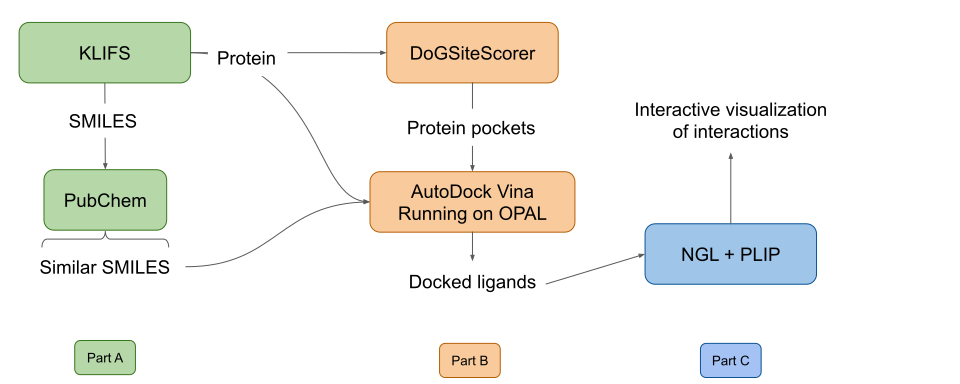

In [5]:
from IPython.display import SVG
SVG("""<svg version="1.1" viewBox="0.0 0.0 960.0 384.0" fill="none" stroke="none" stroke-linecap="square" stroke-miterlimit="10" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg"><clipPath id="p.0"><path d="m0 0l960.0 0l0 384.0l-960.0 0l0 -384.0z" clip-rule="nonzero"/></clipPath><g clip-path="url(#p.0)"><path fill="#ffffff" d="m0 0l960.0 0l0 384.0l-960.0 0z" fill-rule="evenodd"/><path fill="#000000" fill-opacity="0.0" d="m104.8294 82.908424l0.50393677 86.803154" fill-rule="evenodd"/><path stroke="#595959" stroke-width="1.0" stroke-linejoin="round" stroke-linecap="butt" d="m104.8294 82.90843l0.46910858 80.80324" fill-rule="evenodd"/><path fill="#595959" stroke="#595959" stroke-width="1.0" stroke-linecap="butt" d="m103.6468 163.72127l1.6780472 4.528427l1.6253586 -4.5476074z" fill-rule="evenodd"/><path fill="#b6d7a8" d="m19.097113 32.51493l0 0c0 -5.566448 4.512497 -10.078943 10.078941 -10.078943l151.30669 0c2.6730957 0 5.2367096 1.0618858 7.126877 2.952053c1.8901825 1.8901691 2.952057 4.453787 2.952057 7.12689l0 40.314552c0 5.566452 -4.512497 10.078941 -10.078934 10.078941l-151.30669 0c-5.5664444 0 -10.078941 -4.5124893 -10.078941 -10.078941z" fill-rule="evenodd"/><path stroke="#38761d" stroke-width="1.0" stroke-linejoin="round" stroke-linecap="butt" d="m19.097113 32.51493l0 0c0 -5.566448 4.512497 -10.078943 10.078941 -10.078943l151.30669 0c2.6730957 0 5.2367096 1.0618858 7.126877 2.952053c1.8901825 1.8901691 2.952057 4.453787 2.952057 7.12689l0 40.314552c0 5.566452 -4.512497 10.078941 -10.078934 10.078941l-151.30669 0c-5.5664444 0 -10.078941 -4.5124893 -10.078941 -10.078941z" fill-rule="evenodd"/><path fill="#000000" d="m80.2677 59.592205l0 -13.359375l1.78125 0l0 6.625l6.625 -6.625l2.390625 0l-5.59375 5.421875l5.84375 7.9375l-2.328125 0l-4.765625 -6.765625l-2.171875 2.140625l0 4.625l-1.78125 0zm12.443573 0l0 -13.359375l1.78125 0l0 11.78125l6.5625 0l0 1.578125l-8.34375 0zm10.750717 0l0 -13.359375l1.765625 0l0 13.359375l-1.765625 0zm4.980179 0l0 -13.359375l9.015625 0l0 1.578125l-7.25 0l0 4.140625l6.265625 0l0 1.578125l-6.265625 0l0 6.0625l-1.765625 0zm10.708481 -4.296875l1.65625 -0.140625q0.125 1.0 0.546875 1.640625q0.4375 0.640625 1.34375 1.046875q0.921875 0.390625 2.0625 0.390625q1.0 0 1.78125 -0.296875q0.78125 -0.296875 1.15625 -0.8125q0.375 -0.53125 0.375 -1.15625q0 -0.625 -0.375 -1.09375q-0.359375 -0.46875 -1.1875 -0.796875q-0.546875 -0.203125 -2.390625 -0.640625q-1.828125 -0.453125 -2.5625 -0.84375q-0.96875 -0.5 -1.4375 -1.234375q-0.46875 -0.75 -0.46875 -1.671875q0 -1.0 0.578125 -1.875q0.578125 -0.890625 1.671875 -1.34375q1.109375 -0.453125 2.453125 -0.453125q1.484375 0 2.609375 0.484375q1.140625 0.46875 1.75 1.40625q0.609375 0.921875 0.65625 2.09375l-1.6875 0.125q-0.140625 -1.265625 -0.9375 -1.90625q-0.78125 -0.65625 -2.3125 -0.65625q-1.609375 0 -2.34375 0.59375q-0.734375 0.59375 -0.734375 1.421875q0 0.71875 0.53125 1.171875q0.5 0.46875 2.65625 0.96875q2.15625 0.484375 2.953125 0.84375q1.171875 0.53125 1.71875 1.359375q0.5625 0.828125 0.5625 1.90625q0 1.0625 -0.609375 2.015625q-0.609375 0.9375 -1.75 1.46875q-1.140625 0.515625 -2.578125 0.515625q-1.8125 0 -3.046875 -0.53125q-1.21875 -0.53125 -1.921875 -1.59375q-0.6875 -1.0625 -0.71875 -2.40625z" fill-rule="nonzero"/><path fill="#b6d7a8" d="m43.968502 179.7876l0 0c0 -5.566437 4.512497 -10.078934 10.078945 -10.078934l102.55077 0c2.673111 0 5.236725 1.0618896 7.126892 2.952057c1.8901672 1.8901672 2.952057 4.453781 2.952057 7.126877l0 40.31456c0 5.566452 -4.512497 10.078949 -10.078949 10.078949l-102.55077 0c-5.566448 0 -10.078945 -4.512497 -10.078945 -10.078949z" fill-rule="evenodd"/><path stroke="#38761d" stroke-width="1.0" stroke-linejoin="round" stroke-linecap="butt" d="m43.968502 179.7876l0 0c0 -5.566437 4.512497 -10.078934 10.078945 -10.078934l102.55077 0c2.673111 0 5.236725 1.0618896 7.126892 2.952057c1.8901672 1.8901672 2.952057 4.453781 2.952057 7.126877l0 40.31456c0 5.566452 -4.512497 10.078949 -10.078949 10.078949l-102.55077 0c-5.566448 0 -10.078945 -4.512497 -10.078945 -10.078949z" fill-rule="evenodd"/><path fill="#000000" d="m65.28024 206.86488l0 -13.359375l5.046875 0q1.328125 0 2.03125 0.125q0.96875 0.171875 1.640625 0.640625q0.671875 0.453125 1.078125 1.28125q0.40625 0.828125 0.40625 1.828125q0 1.703125 -1.09375 2.890625q-1.078125 1.171875 -3.921875 1.171875l-3.421875 0l0 5.421875l-1.765625 0zm1.765625 -7.0l3.453125 0q1.71875 0 2.4375 -0.640625q0.71875 -0.640625 0.71875 -1.796875q0 -0.84375 -0.421875 -1.4375q-0.421875 -0.59375 -1.125 -0.78125q-0.4375 -0.125 -1.640625 -0.125l-3.421875 0l0 4.78125zm16.802948 7.0l0 -1.421875q-1.125 1.640625 -3.0625 1.640625q-0.859375 0 -1.609375 -0.328125q-0.734375 -0.328125 -1.09375 -0.828125q-0.359375 -0.5 -0.5 -1.21875q-0.109375 -0.46875 -0.109375 -1.53125l0 -5.984375l1.640625 0l0 5.359375q0 1.28125 0.109375 1.734375q0.15625 0.640625 0.65625 1.015625q0.5 0.375 1.234375 0.375q0.734375 0 1.375 -0.375q0.65625 -0.390625 0.921875 -1.03125q0.265625 -0.65625 0.265625 -1.890625l0 -5.1875l1.640625 0l0 9.671875l-1.46875 0zm5.547592 0l-1.515625 0l0 -13.359375l1.640625 0l0 4.765625q1.046875 -1.296875 2.65625 -1.296875q0.890625 0 1.6875 0.359375q0.796875 0.359375 1.3125 1.015625q0.515625 0.640625 0.796875 1.5625q0.296875 0.921875 0.296875 1.96875q0 2.484375 -1.234375 3.84375q-1.21875 1.359375 -2.953125 1.359375q-1.703125 0 -2.6875 -1.4375l0 1.21875zm-0.015625 -4.90625q0 1.734375 0.484375 2.515625q0.765625 1.265625 2.09375 1.265625q1.078125 0 1.859375 -0.9375q0.78125 -0.9375 0.78125 -2.78125q0 -1.890625 -0.75 -2.796875q-0.75 -0.90625 -1.828125 -0.90625q-1.0625 0 -1.859375 0.9375q-0.78125 0.9375 -0.78125 2.703125zm18.625717 0.21875l1.765625 0.453125q-0.5625 2.171875 -2.0 3.328125q-1.4375 1.140625 -3.53125 1.140625q-2.15625 0 -3.515625 -0.875q-1.34375 -0.890625 -2.0625 -2.546875q-0.703125 -1.671875 -0.703125 -3.59375q0 -2.078125 0.796875 -3.625q0.796875 -1.5625 2.265625 -2.359375q1.484375 -0.8125 3.25 -0.8125q2.0 0 3.359375 1.015625q1.375 1.015625 1.90625 2.875l-1.734375 0.40625q-0.46875 -1.453125 -1.359375 -2.109375q-0.875 -0.671875 -2.203125 -0.671875q-1.546875 0 -2.578125 0.734375q-1.03125 0.734375 -1.453125 1.984375q-0.421875 1.234375 -0.421875 2.5625q0 1.703125 0.5 2.96875q0.5 1.265625 1.546875 1.90625q1.046875 0.625 2.265625 0.625q1.484375 0 2.515625 -0.859375q1.03125 -0.859375 1.390625 -2.546875zm3.7385635 4.6875l0 -13.359375l1.640625 0l0 4.796875q1.140625 -1.328125 2.890625 -1.328125q1.078125 0 1.859375 0.421875q0.796875 0.421875 1.140625 1.171875q0.34375 0.75 0.34375 2.171875l0 6.125l-1.640625 0l0 -6.125q0 -1.234375 -0.53125 -1.796875q-0.53125 -0.5625 -1.515625 -0.5625q-0.71875 0 -1.359375 0.390625q-0.640625 0.375 -0.921875 1.015625q-0.265625 0.640625 -0.265625 1.78125l0 5.296875l-1.640625 0zm17.000725 -3.109375l1.6875 0.203125q-0.40625 1.484375 -1.484375 2.3125q-1.0781326 0.8125 -2.7656326 0.8125q-2.125 0 -3.375 -1.296875q-1.234375 -1.3125 -1.234375 -3.671875q0 -2.453125 1.25 -3.796875q1.265625 -1.34375 3.265625 -1.34375q1.9375076 0 3.1562576 1.328125q1.234375 1.3125 1.234375 3.703125q0 0.15625 0 0.4375l-7.2187576 0q0.09375 1.59375 0.90625 2.453125q0.8125 0.84375 2.015625 0.84375q0.90625 0 1.546875 -0.46875q0.6406326 -0.484375 1.0156326 -1.515625zm-5.3906326 -2.65625l5.4062576 0q-0.109375 -1.21875 -0.625 -1.828125q-0.7812576 -0.953125 -2.0312576 -0.953125q-1.125 0 -1.90625 0.765625q-0.765625 0.75 -0.84375 2.015625zm9.14135 5.765625l0 -9.671875l1.46875 0l0 1.359375q0.453125 -0.71875 1.203125 -1.140625q0.765625 -0.4375 1.71875 -0.4375q1.078125 0 1.765625 0.453125q0.6875 0.4375 0.96875 1.234375q1.15625 -1.6875 2.984375 -1.6875q1.453125 0 2.21875 0.796875q0.78125 0.796875 0.78125 2.453125l0 6.640625l-1.640625 0l0 -6.09375q0 -0.984375 -0.15625 -1.40625q-0.15625 -0.4375 -0.578125 -0.703125q-0.421875 -0.265625 -0.984375 -0.265625q-1.015625 0 -1.6875 0.6875q-0.671875 0.671875 -0.671875 2.15625l0 5.625l-1.640625 0l0 -6.28125q0 -1.09375 -0.40625 -1.640625q-0.40625 -0.546875 -1.3125 -0.546875q-0.6875 0 -1.28125 0.359375q-0.59375 0.359375 -0.859375 1.0625q-0.25 0.703125 -0.25 2.03125l0 5.015625l-1.640625 0z" fill-rule="nonzero"/><path fill="#000000" fill-opacity="0.0" d="m41.952755 246.86877c0 -4.279114 2.2167053 -7.7480316 4.951149 -7.7480316l53.467785 0c2.7344437 0 4.951149 -3.4689178 4.951149 -7.7480316l0 0c0 4.279114 2.2166977 7.7480316 4.9511414 7.7480316l53.46778 0l0 0c2.7344513 0 4.9511566 3.4689178 4.9511566 7.7480316z" fill-rule="evenodd"/><path fill="#000000" fill-opacity="0.0" d="m41.952755 246.86877c0 -4.279114 2.2167053 -7.7480316 4.951149 -7.7480316l53.467785 0c2.7344437 0 4.951149 -3.4689178 4.951149 -7.7480316l0 0c0 4.279114 2.2166977 7.7480316 4.9511414 7.7480316l53.46778 0l0 0c2.7344513 0 4.9511566 3.4689178 4.9511566 7.7480316" fill-rule="evenodd"/><path stroke="#595959" stroke-width="1.0" stroke-linejoin="round" stroke-linecap="butt" d="m41.952755 246.86877c0 -4.279114 2.2167053 -7.7480316 4.951149 -7.7480316l53.467785 0c2.7344437 0 4.951149 -3.4689178 4.951149 -7.7480316l0 0c0 4.279114 2.2166977 7.7480316 4.9511414 7.7480316l53.46778 0l0 0c2.7344513 0 4.9511566 3.4689178 4.9511566 7.7480316" fill-rule="evenodd"/><path fill="#000000" fill-opacity="0.0" d="m23.742783 242.14961l162.17323 0l0 49.196854l-162.17323 0z" fill-rule="evenodd"/><path fill="#000000" d="m40.36261 269.37115l1.65625 -0.140625q0.125 1.0 0.546875 1.640625q0.4375 0.640625 1.34375 1.046875q0.921875 0.390625 2.0625 0.390625q1.0 0 1.78125 -0.296875q0.78125 -0.296875 1.15625 -0.8125q0.375 -0.53125 0.375 -1.15625q0 -0.625 -0.375 -1.09375q-0.359375 -0.46875 -1.1875 -0.796875q-0.546875 -0.203125 -2.390625 -0.640625q-1.828125 -0.453125 -2.5625 -0.84375q-0.96875 -0.5 -1.4375 -1.234375q-0.46875 -0.75 -0.46875 -1.671875q0 -1.0 0.578125 -1.875q0.578125 -0.890625 1.671875 -1.34375q1.109375 -0.453125 2.453125 -0.453125q1.484375 0 2.609375 0.484375q1.140625 0.46875 1.75 1.40625q0.609375 0.921875 0.65625 2.09375l-1.6875 0.125q-0.140625 -1.265625 -0.9375 -1.90625q-0.78125 -0.65625 -2.3125 -0.65625q-1.609375 0 -2.34375 0.59375q-0.734375 0.59375 -0.734375 1.421875q0 0.71875 0.53125 1.171875q0.5 0.46875 2.65625 0.96875q2.15625 0.484375 2.953125 0.84375q1.171875 0.53125 1.71875 1.359375q0.5625 0.828125 0.5625 1.90625q0 1.0625 -0.609375 2.015625q-0.609375 0.9375 -1.75 1.46875q-1.140625 0.515625 -2.578125 0.515625q-1.8125 0 -3.046875 -0.53125q-1.21875 -0.53125 -1.921875 -1.59375q-0.6875 -1.0625 -0.71875 -2.40625zm12.834198 -7.171875l0 -1.890625l1.640625 0l0 1.890625l-1.640625 0zm0 11.46875l0 -9.671875l1.640625 0l0 9.671875l-1.640625 0zm4.144821 0l0 -9.671875l1.46875 0l0 1.359375q0.453125 -0.71875 1.203125 -1.140625q0.765625 -0.4375 1.71875 -0.4375q1.078125 0 1.765625 0.453125q0.6875 0.4375 0.96875 1.234375q1.15625 -1.6875 2.984375 -1.6875q1.453125 0 2.21875 0.796875q0.78125 0.796875 0.78125 2.453125l0 6.640625l-1.640625 0l0 -6.09375q0 -0.984375 -0.15625 -1.40625q-0.15625 -0.4375 -0.578125 -0.703125q-0.421875 -0.265625 -0.984375 -0.265625q-1.015625 0 -1.6875 0.6875q-0.671875 0.671875 -0.671875 2.15625l0 5.625l-1.640625 0l0 -6.28125q0 -1.09375 -0.40625 -1.640625q-0.40625 -0.546875 -1.3125 -0.546875q-0.6875 0 -1.28125 0.359375q-0.59375 0.359375 -0.859375 1.0625q-0.25 0.703125 -0.25 2.03125l0 5.015625l-1.640625 0zm15.540802 -11.46875l0 -1.890625l1.640625 0l0 1.890625l-1.640625 0zm0 11.46875l0 -9.671875l1.640625 0l0 9.671875l-1.640625 0zm4.097946 0l0 -13.359375l1.640625 0l0 13.359375l-1.640625 0zm10.504196 -1.1875q-0.921875 0.765625 -1.765625 1.09375q-0.828125 0.3125 -1.796875 0.3125q-1.59375 0 -2.453125 -0.78125q-0.859375 -0.78125 -0.859375 -1.984375q0 -0.71875 0.328125 -1.296875q0.328125 -0.59375 0.84375 -0.9375q0.53125 -0.359375 1.1875 -0.546875q0.46875 -0.125 1.453125 -0.25q1.984375 -0.234375 2.921875 -0.5625q0.015625 -0.34375 0.015625 -0.421875q0 -1.0 -0.46875 -1.421875q-0.625 -0.546875 -1.875 -0.546875q-1.15625 0 -1.703125 0.40625q-0.546875 0.40625 -0.8125 1.421875l-1.609375 -0.21875q0.21875 -1.015625 0.71875 -1.640625q0.5 -0.640625 1.453125 -0.984375q0.953125 -0.34375 2.1875 -0.34375q1.25 0 2.015625 0.296875q0.78125 0.28125 1.140625 0.734375q0.375 0.4375 0.515625 1.109375q0.078125 0.421875 0.078125 1.515625l0 2.1875q0 2.28125 0.109375 2.890625q0.109375 0.59375 0.40625 1.15625l-1.703125 0q-0.265625 -0.515625 -0.328125 -1.1875zm-0.140625 -3.671875q-0.890625 0.375 -2.671875 0.625q-1.015625 0.140625 -1.4375 0.328125q-0.421875 0.1875 -0.65625 0.53125q-0.21875 0.34375 -0.21875 0.78125q0 0.65625 0.5 1.09375q0.5 0.4375 1.453125 0.4375q0.9375 0 1.671875 -0.40625q0.75 -0.421875 1.09375 -1.140625q0.265625 -0.5625 0.265625 -1.640625l0 -0.609375zm4.188217 4.859375l0 -9.671875l1.46875 0l0 1.46875q0.5625 -1.03125 1.03125 -1.359375q0.484375 -0.328125 1.0625 -0.328125q0.828125 0 1.6875 0.53125l-0.5625 1.515625q-0.609375 -0.359375 -1.203125 -0.359375q-0.546875 0 -0.96875 0.328125q-0.421875 0.328125 -0.609375 0.890625q-0.28125 0.875 -0.28125 1.921875l0 5.0625l-1.625 0zm11.020981 -4.296875l1.65625 -0.140625q0.125 1.0 0.546875 1.640625q0.4375 0.640625 1.34375 1.046875q0.921875 0.390625 2.0625 0.390625q1.0 0 1.78125 -0.296875q0.78125 -0.296875 1.15625 -0.8125q0.375 -0.53125 0.375 -1.15625q0 -0.625 -0.375 -1.09375q-0.359375 -0.46875 -1.1875 -0.796875q-0.546875 -0.203125 -2.390625 -0.640625q-1.828125 -0.453125 -2.5625 -0.84375q-0.96875 -0.5 -1.4375 -1.234375q-0.46875 -0.75 -0.46875 -1.671875q0 -1.0 0.578125 -1.875q0.578125 -0.890625 1.671875 -1.34375q1.109375 -0.453125 2.453125 -0.453125q1.484375 0 2.609375 0.484375q1.140625 0.46875 1.75 1.40625q0.609375 0.921875 0.65625 2.09375l-1.6875 0.125q-0.140625 -1.265625 -0.9375 -1.90625q-0.78125 -0.65625 -2.3125 -0.65625q-1.609375 0 -2.34375 0.59375q-0.734375 0.59375 -0.734375 1.421875q0 0.71875 0.53125 1.171875q0.5 0.46875 2.65625 0.96875q2.15625 0.484375 2.953125 0.84375q1.171875 0.53125 1.71875 1.359375q0.5625 0.828125 0.5625 1.90625q0 1.0625 -0.609375 2.015625q-0.609375 0.9375 -1.75 1.46875q-1.140625 0.515625 -2.578125 0.515625q-1.8125 0 -3.046875 -0.53125q-1.21875 -0.53125 -1.921875 -1.59375q-0.6875 -1.0625 -0.71875 -2.40625zm12.990448 4.296875l0 -13.359375l2.65625 0l3.15625 9.453125q0.4375 1.328125 0.640625 1.984375q0.234375 -0.734375 0.703125 -2.140625l3.203125 -9.296875l2.375 0l0 13.359375l-1.703125 0l0 -11.171875l-3.875 11.171875l-1.59375 0l-3.859375 -11.375l0 11.375l-1.703125 0zm15.884552 0l0 -13.359375l1.765625 0l0 13.359375l-1.765625 0zm4.808304 0l0 -13.359375l1.78125 0l0 11.78125l6.5625 0l0 1.578125l-8.34375 0zm10.485092 0l0 -13.359375l9.65625 0l0 1.578125l-7.875 0l0 4.09375l7.375 0l0 1.5625l-7.375 0l0 4.546875l8.1875 0l0 1.578125l-9.96875 0zm11.818573 -4.296875l1.65625 -0.140625q0.125 1.0 0.546875 1.640625q0.4375 0.640625 1.34375 1.046875q0.921875 0.390625 2.0625 0.390625q1.0 0 1.78125 -0.296875q0.78125 -0.296875 1.15625 -0.8125q0.375 -0.53125 0.375 -1.15625q0 -0.625 -0.375 -1.09375q-0.359375 -0.46875 -1.1875 -0.796875q-0.546875 -0.203125 -2.390625 -0.640625q-1.828125 -0.453125 -2.5625 -0.84375q-0.96875 -0.5 -1.4375 -1.234375q-0.46875 -0.75 -0.46875 -1.671875q0 -1.0 0.578125 -1.875q0.578125 -0.890625 1.671875 -1.34375q1.109375 -0.453125 2.453125 -0.453125q1.484375 0 2.609375 0.484375q1.140625 0.46875 1.75 1.40625q0.609375 0.921875 0.65625 2.09375l-1.6875 0.125q-0.140625 -1.265625 -0.9375 -1.90625q-0.78125 -0.65625 -2.3125 -0.65625q-1.609375 0 -2.34375 0.59375q-0.734375 0.59375 -0.734375 1.421875q0 0.71875 0.53125 1.171875q0.5 0.46875 2.65625 0.96875q2.15625 0.484375 2.953125 0.84375q1.171875 0.53125 1.71875 1.359375q0.5625 0.828125 0.5625 1.90625q0 1.0625 -0.609375 2.015625q-0.609375 0.9375 -1.75 1.46875q-1.140625 0.515625 -2.578125 0.515625q-1.8125 0 -3.046875 -0.53125q-1.21875 -0.53125 -1.921875 -1.59375q-0.6875 -1.0625 -0.71875 -2.40625z" fill-rule="nonzero"/><path fill="#f9cb9c" d="m386.73358 32.50443l0 0c0 -5.5664444 4.512512 -10.078941 10.078949 -10.078941l151.30667 0c2.6730957 0 5.2367554 1.0618858 7.126892 2.952055c1.8901978 1.8901672 2.9520874 4.453787 2.9520874 7.1268864l0 40.314556c0 5.566452 -4.512512 10.078941 -10.0789795 10.078941l-151.30667 0c-5.566437 0 -10.078949 -4.5124893 -10.078949 -10.078941z" fill-rule="evenodd"/><path stroke="#b45f06" stroke-width="1.0" stroke-linejoin="round" stroke-linecap="butt" d="m386.73358 32.50443l0 0c0 -5.5664444 4.512512 -10.078941 10.078949 -10.078941l151.30667 0c2.6730957 0 5.2367554 1.0618858 7.126892 2.952055c1.8901978 1.8901672 2.9520874 4.453787 2.9520874 7.1268864l0 40.314556c0 5.566452 -4.512512 10.078941 -10.0789795 10.078941l-151.30667 0c-5.566437 0 -10.078949 -4.5124893 -10.078949 -10.078941z" fill-rule="evenodd"/><path fill="#000000" d="m411.17538 59.581707l0 -13.359375l4.609375 0q1.546875 0 2.375 0.203125q1.140625 0.25 1.953125 0.953125q1.0625 0.890625 1.578125 2.28125q0.53125 1.390625 0.53125 3.171875q0 1.515625 -0.359375 2.703125q-0.359375 1.171875 -0.921875 1.9375q-0.546875 0.765625 -1.203125 1.21875q-0.65625 0.4375 -1.59375 0.671875q-0.9375 0.21875 -2.140625 0.21875l-4.828125 0zm1.765625 -1.578125l2.859375 0q1.3125 0 2.0625 -0.234375q0.75 -0.25 1.203125 -0.703125q0.625 -0.625 0.96875 -1.6875q0.359375 -1.0625 0.359375 -2.578125q0 -2.09375 -0.6875 -3.21875q-0.6875 -1.125 -1.671875 -1.5q-0.703125 -0.28125 -2.28125 -0.28125l-2.8125 0l0 10.203125zm10.894836 -3.265625q0 -2.6875 1.484375 -3.96875q1.25 -1.078125 3.046875 -1.078125q2.0 0 3.265625 1.3125q1.265625 1.296875 1.265625 3.609375q0 1.859375 -0.5625 2.9375q-0.5625 1.0625 -1.640625 1.65625q-1.0625 0.59375 -2.328125 0.59375q-2.03125 0 -3.28125 -1.296875q-1.25 -1.3125 -1.25 -3.765625zm1.6875 0q0 1.859375 0.796875 2.796875q0.8125 0.921875 2.046875 0.921875q1.21875 0 2.03125 -0.921875q0.8125 -0.9375 0.8125 -2.84375q0 -1.796875 -0.8125 -2.71875q-0.8125 -0.921875 -2.03125 -0.921875q-1.234375 0 -2.046875 0.921875q-0.796875 0.90625 -0.796875 2.765625zm15.750702 -0.390625l0 -1.578125l5.65625 0l0 4.953125q-1.296875 1.046875 -2.6875 1.578125q-1.375 0.515625 -2.84375 0.515625q-1.96875 0 -3.578125 -0.84375q-1.609375 -0.84375 -2.421875 -2.4375q-0.8125 -1.59375 -0.8125 -3.5625q0 -1.953125 0.8125 -3.640625q0.8125 -1.6875 2.34375 -2.5q1.53125 -0.828125 3.515625 -0.828125q1.453125 0 2.625 0.46875q1.171875 0.46875 1.828125 1.3125q0.671875 0.828125 1.015625 2.171875l-1.59375 0.4375q-0.296875 -1.015625 -0.75 -1.59375q-0.4375 -0.59375 -1.265625 -0.9375q-0.828125 -0.34375 -1.84375 -0.34375q-1.203125 0 -2.09375 0.375q-0.890625 0.359375 -1.4375 0.96875q-0.53125 0.59375 -0.828125 1.3125q-0.515625 1.234375 -0.515625 2.6875q0 1.78125 0.609375 2.984375q0.625 1.203125 1.796875 1.796875q1.171875 0.578125 2.5 0.578125q1.140625 0 2.234375 -0.4375q1.09375 -0.453125 1.65625 -0.953125l0 -2.484375l-3.921875 0zm7.667694 0.9375l1.65625 -0.140625q0.125 1.0 0.546875 1.640625q0.4375 0.640625 1.34375 1.046875q0.921875 0.390625 2.0625 0.390625q1.0 0 1.78125 -0.296875q0.78125 -0.296875 1.15625 -0.8125q0.375 -0.53125 0.375 -1.15625q0 -0.625 -0.375 -1.09375q-0.359375 -0.46875 -1.1875 -0.796875q-0.546875 -0.203125 -2.390625 -0.640625q-1.828125 -0.453125 -2.5625 -0.84375q-0.96875 -0.5 -1.4375 -1.234375q-0.46875 -0.75 -0.46875 -1.671875q0 -1.0 0.578125 -1.875q0.578125 -0.890625 1.671875 -1.34375q1.109375 -0.453125 2.453125 -0.453125q1.484375 0 2.609375 0.484375q1.140625 0.46875 1.75 1.40625q0.609375 0.921875 0.65625 2.09375l-1.6875 0.125q-0.140625 -1.265625 -0.9375 -1.90625q-0.78125 -0.65625 -2.3125 -0.65625q-1.609375 0 -2.34375 0.59375q-0.734375 0.59375 -0.734375 1.421875q0 0.71875 0.53125 1.171875q0.5 0.46875 2.65625 0.96875q2.15625 0.484375 2.953125 0.84375q1.171875 0.53125 1.71875 1.359375q0.5625 0.828125 0.5625 1.90625q0 1.0625 -0.609375 2.015625q-0.609375 0.9375 -1.75 1.46875q-1.140625 0.515625 -2.578125 0.515625q-1.8125 0 -3.046875 -0.53125q-1.21875 -0.53125 -1.921875 -1.59375q-0.6875 -1.0625 -0.71875 -2.40625zm12.834198 -7.171875l0 -1.890625l1.640625 0l0 1.890625l-1.640625 0zm0 11.46875l0 -9.671875l1.640625 0l0 9.671875l-1.640625 0zm7.722931 -1.46875l0.234375 1.453125q-0.6875 0.140625 -1.234375 0.140625q-0.890625 0 -1.390625 -0.28125q-0.484375 -0.28125 -0.6875 -0.734375q-0.203125 -0.46875 -0.203125 -1.9375l0 -5.578125l-1.203125 0l0 -1.265625l1.203125 0l0 -2.390625l1.625 -0.984375l0 3.375l1.65625 0l0 1.265625l-1.65625 0l0 5.671875q0 0.6875 0.078125 0.890625q0.09375 0.203125 0.28125 0.328125q0.203125 0.109375 0.578125 0.109375q0.265625 0 0.71875 -0.0625zm8.230194 -1.640625l1.6875 0.203125q-0.40625 1.484375 -1.484375 2.3125q-1.078125 0.8125 -2.765625 0.8125q-2.125 0 -3.375 -1.296875q-1.234375 -1.3125 -1.234375 -3.671875q0 -2.453125 1.25 -3.796875q1.265625 -1.34375 3.265625 -1.34375q1.9375 0 3.15625 1.328125q1.234375 1.3125 1.234375 3.703125q0 0.15625 0 0.4375l-7.21875 0q0.09375 1.59375 0.90625 2.453125q0.8125 0.84375 2.015625 0.84375q0.90625 0 1.546875 -0.46875q0.640625 -0.484375 1.015625 -1.515625zm-5.390625 -2.65625l5.40625 0q-0.109375 -1.21875 -0.625 -1.828125q-0.78125 -0.953125 -2.03125 -0.953125q-1.125 0 -1.90625 0.765625q-0.765625 0.75 -0.84375 2.015625zm8.750702 1.46875l1.65625 -0.140625q0.125 1.0 0.546875 1.640625q0.4375 0.640625 1.34375 1.046875q0.921875 0.390625 2.0625 0.390625q1.0 0 1.78125 -0.296875q0.78125 -0.296875 1.15625 -0.8125q0.375 -0.53125 0.375 -1.15625q0 -0.625 -0.375 -1.09375q-0.359375 -0.46875 -1.1875 -0.796875q-0.546875 -0.203125 -2.390625 -0.640625q-1.828125 -0.453125 -2.5625 -0.84375q-0.96875 -0.5 -1.4375 -1.234375q-0.46875 -0.75 -0.46875 -1.671875q0 -1.0 0.578125 -1.875q0.578125 -0.890625 1.671875 -1.34375q1.109375 -0.453125 2.453125 -0.453125q1.484375 0 2.609375 0.484375q1.140625 0.46875 1.75 1.40625q0.609375 0.921875 0.65625 2.09375l-1.6875 0.125q-0.140625 -1.265625 -0.9375 -1.90625q-0.78125 -0.65625 -2.3125 -0.65625q-1.609375 0 -2.34375 0.59375q-0.734375 0.59375 -0.734375 1.421875q0 0.71875 0.53125 1.171875q0.5 0.46875 2.65625 0.96875q2.15625 0.484375 2.953125 0.84375q1.171875 0.53125 1.71875 1.359375q0.5625 0.828125 0.5625 1.90625q0 1.0625 -0.609375 2.015625q-0.609375 0.9375 -1.75 1.46875q-1.140625 0.515625 -2.578125 0.515625q-1.8125 0 -3.046875 -0.53125q-1.21875 -0.53125 -1.921875 -1.59375q-0.6875 -1.0625 -0.71875 -2.40625zm19.146698 0.75l1.609375 0.21875q-0.265625 1.65625 -1.359375 2.609375q-1.078125 0.9375 -2.671875 0.9375q-1.984375 0 -3.1875 -1.296875q-1.203125 -1.296875 -1.203125 -3.71875q0 -1.578125 0.515625 -2.75q0.515625 -1.171875 1.578125 -1.75q1.0625 -0.59375 2.3125 -0.59375q1.578125 0 2.578125 0.796875q1.0 0.796875 1.28125 2.265625l-1.59375 0.234375q-0.234375 -0.96875 -0.8125 -1.453125q-0.578125 -0.5 -1.390625 -0.5q-1.234375 0 -2.015625 0.890625q-0.78125 0.890625 -0.78125 2.8125q0 1.953125 0.75 2.84375q0.75 0.875 1.953125 0.875q0.96875 0 1.609375 -0.59375q0.65625 -0.59375 0.828125 -1.828125zm2.40625 -1.296875q0 -2.6875 1.484375 -3.96875q1.25 -1.078125 3.046875 -1.078125q2.0 0 3.265625 1.3125q1.265625 1.296875 1.265625 3.609375q0 1.859375 -0.5625 2.9375q-0.5625 1.0625 -1.640625 1.65625q-1.0625 0.59375 -2.328125 0.59375q-2.03125 0 -3.28125 -1.296875q-1.25 -1.3125 -1.25 -3.765625zm1.6875 0q0 1.859375 0.796875 2.796875q0.8125 0.921875 2.046875 0.921875q1.21875 0 2.03125 -0.921875q0.8125 -0.9375 0.8125 -2.84375q0 -1.796875 -0.8125 -2.71875q-0.8125 -0.921875 -2.03125 -0.921875q-1.234375 0 -2.046875 0.921875q-0.796875 0.90625 -0.796875 2.765625zm9.281982 4.84375l0 -9.671875l1.46875 0l0 1.46875q0.5625 -1.03125 1.03125 -1.359375q0.484375 -0.328125 1.0625 -0.328125q0.828125 0 1.6875 0.53125l-0.5625 1.515625q-0.609375 -0.359375 -1.203125 -0.359375q-0.546875 0 -0.96875 0.328125q-0.421875 0.328125 -0.609375 0.890625q-0.28125 0.875 -0.28125 1.921875l0 5.0625l-1.625 0zm12.8532715 -3.109375l1.6875 0.203125q-0.40625 1.484375 -1.484375 2.3125q-1.078125 0.8125 -2.765625 0.8125q-2.125 0 -3.375 -1.296875q-1.234375 -1.3125 -1.234375 -3.671875q0 -2.453125 1.25 -3.796875q1.265625 -1.34375 3.265625 -1.34375q1.9375 0 3.15625 1.328125q1.234375 1.3125 1.234375 3.703125q0 0.15625 0 0.4375l-7.21875 0q0.09375 1.59375 0.90625 2.453125q0.8125 0.84375 2.015625 0.84375q0.90625 0 1.546875 -0.46875q0.640625 -0.484375 1.015625 -1.515625zm-5.390625 -2.65625l5.40625 0q-0.109375 -1.21875 -0.625 -1.828125q-0.78125 -0.953125 -2.03125 -0.953125q-1.125 0 -1.90625 0.765625q-0.765625 0.75 -0.84375 2.015625zm9.125732 5.765625l0 -9.671875l1.46875 0l0 1.46875q0.5625 -1.03125 1.03125 -1.359375q0.484375 -0.328125 1.0625 -0.328125q0.828125 0 1.6875 0.53125l-0.5625 1.515625q-0.609375 -0.359375 -1.203125 -0.359375q-0.546875 0 -0.96875 0.328125q-0.421875 0.328125 -0.609375 0.890625q-0.28125 0.875 -0.28125 1.921875l0 5.0625l-1.625 0z" fill-rule="nonzero"/><path fill="#000000" fill-opacity="0.0" d="m190.56168 52.672207c58.09056 0 93.75198 37.31496 116.18112 74.62993c22.429138 37.314964 31.625977 74.62992 63.251953 74.62992" fill-rule="evenodd"/><path stroke="#595959" stroke-width="1.0" stroke-linejoin="round" stroke-linecap="butt" d="m190.56168 52.672207c58.09056 0 93.75198 37.31496 116.18112 74.62991c11.214569 18.657486 19.121063 37.314957 28.177155 51.308075c4.5280457 6.9965515 9.343506 12.827011 15.003571 16.90834c2.8300476 2.0406647 5.871216 3.6440277 9.193207 4.7372437c0.83047485 0.27331543 1.6785583 0.51472473 2.545227 0.723114c0.4333496 0.10421753 0.8713379 0.20013428 1.314148 0.2876892c0.22140503 0.043762207 0.44400024 0.08544922 0.66781616 0.12498474l0.36999512 0.061553955" fill-rule="evenodd"/><path fill="#595959" stroke="#595959" stroke-width="1.0" stroke-linecap="butt" d="m363.88205 203.09958l4.6554565 -1.2842255l-4.391754 -2.0086975z" fill-rule="evenodd"/><path fill="#000000" fill-opacity="0.0" d="m185.91602 266.74802c46.02362 0 69.03543 -16.204712 92.04724 -32.40944c23.01181 -16.204712 46.02362 -32.40944 92.04724 -32.40944" fill-rule="evenodd"/><path stroke="#595959" stroke-width="1.0" stroke-linejoin="round" stroke-linecap="butt" d="m185.91602 266.74802c46.02362 0 69.03543 -16.204712 92.04724 -32.40944c11.50589 -8.102356 23.01181 -16.204712 37.394196 -22.281494c7.1911926 -3.0383759 15.101501 -5.5703735 24.090485 -7.342758c4.4944763 -0.88619995 9.258667 -1.5825043 14.337463 -2.057251c2.5393677 -0.23736572 5.157379 -0.4193573 7.859741 -0.5419922c0.6755676 -0.030654907 1.3564148 -0.057632446 2.0426025 -0.08079529l0.32348633 -0.010009766" fill-rule="evenodd"/><path fill="#595959" stroke="#595959" stroke-width="1.0" stroke-linecap="butt" d="m364.03745 203.67581l4.511322 -1.7234955l-4.5637207 -1.5795593z" fill-rule="evenodd"/><path fill="#f9cb9c" d="m369.99475 181.76266l0 0c0 -5.566437 4.5124817 -10.078934 10.078949 -10.078934l184.78702 0c2.6730957 0 5.2366943 1.0618744 7.126831 2.952057c1.8901978 1.8901672 2.9520874 4.453781 2.9520874 7.126877l0 40.31456c0 5.566452 -4.512512 10.078949 -10.078918 10.078949l-184.78702 0c-5.5664673 0 -10.078949 -4.512497 -10.078949 -10.078949z" fill-rule="evenodd"/><path stroke="#b45f06" stroke-width="1.0" stroke-linejoin="round" stroke-linecap="butt" d="m369.99475 181.76266l0 0c0 -5.566437 4.5124817 -10.078934 10.078949 -10.078934l184.78702 0c2.6730957 0 5.2366943 1.0618744 7.126831 2.952057c1.8901978 1.8901672 2.9520874 4.453781 2.9520874 7.126877l0 40.31456c0 5.566452 -4.512512 10.078949 -10.078918 10.078949l-184.78702 0c-5.5664673 0 -10.078949 -4.512497 -10.078949 -10.078949z" fill-rule="evenodd"/><path fill="#000000" d="m410.90137 197.83995l5.125 -13.359375l1.90625 0l5.46875 13.359375l-2.015625 0l-1.546875 -4.046875l-5.59375 0l-1.46875 4.046875l-1.875 0zm3.859375 -5.484375l4.53125 0l-1.40625 -3.703125q-0.625 -1.6875 -0.9375 -2.765625q-0.265625 1.28125 -0.71875 2.546875l-1.46875 3.921875zm16.177948 5.484375l0 -1.421875q-1.125 1.640625 -3.0625 1.640625q-0.859375 0 -1.609375 -0.328125q-0.734375 -0.328125 -1.09375 -0.828125q-0.359375 -0.5 -0.5 -1.21875q-0.109375 -0.46875 -0.109375 -1.53125l0 -5.984375l1.640625 0l0 5.359375q0 1.28125 0.109375 1.734375q0.15625 0.640625 0.65625 1.015625q0.5 0.375 1.234375 0.375q0.734375 0 1.375 -0.375q0.65625 -0.390625 0.921875 -1.03125q0.265625 -0.65625 0.265625 -1.890625l0 -5.1875l1.640625 0l0 9.671875l-1.46875 0zm7.6257324 -1.46875l0.234375 1.453125q-0.6875 0.140625 -1.234375 0.140625q-0.890625 0 -1.390625 -0.28125q-0.484375 -0.28125 -0.6875 -0.734375q-0.203125 -0.46875 -0.203125 -1.9375l0 -5.578125l-1.203125 0l0 -1.265625l1.203125 0l0 -2.390625l1.625 -0.984375l0 3.375l1.65625 0l0 1.265625l-1.65625 0l0 5.671875q0 0.6875 0.078125 0.890625q0.09375 0.203125 0.28125 0.328125q0.203125 0.109375 0.578125 0.109375q0.265625 0 0.71875 -0.0625zm0.9957886 -3.375q0 -2.6875 1.484375 -3.96875q1.25 -1.078125 3.046875 -1.078125q2.0 0 3.265625 1.3125q1.265625 1.296875 1.265625 3.609375q0 1.859375 -0.5625 2.9375q-0.5625 1.0625 -1.640625 1.65625q-1.0625 0.59375 -2.328125 0.59375q-2.03125 0 -3.28125 -1.296875q-1.25 -1.3125 -1.25 -3.765625zm1.6875 0q0 1.859375 0.796875 2.796875q0.8125 0.921875 2.046875 0.921875q1.21875 0 2.03125 -0.921875q0.8125 -0.9375 0.8125 -2.84375q0 -1.796875 -0.8125 -2.71875q-0.8125 -0.921875 -2.03125 -0.921875q-1.234375 0 -2.046875 0.921875q-0.796875 0.90625 -0.796875 2.765625zm9.500732 4.84375l0 -13.359375l4.609375 0q1.546875 0 2.375 0.203125q1.140625 0.25 1.953125 0.953125q1.0625 0.890625 1.578125 2.28125q0.53125 1.390625 0.53125 3.171875q0 1.515625 -0.359375 2.703125q-0.359375 1.171875 -0.921875 1.9375q-0.546875 0.765625 -1.203125 1.21875q-0.65625 0.4375 -1.59375 0.671875q-0.9375 0.21875 -2.140625 0.21875l-4.828125 0zm1.765625 -1.578125l2.859375 0q1.3125 0 2.0625 -0.234375q0.75 -0.25 1.203125 -0.703125q0.625 -0.625 0.96875 -1.6875q0.359375 -1.0625 0.359375 -2.578125q0 -2.09375 -0.6875 -3.21875q-0.6875 -1.125 -1.671875 -1.5q-0.703125 -0.28125 -2.28125 -0.28125l-2.8125 0l0 10.203125zm10.894806 -3.265625q0 -2.6875 1.484375 -3.96875q1.25 -1.078125 3.046875 -1.078125q2.0 0 3.265625 1.3125q1.265625 1.296875 1.265625 3.609375q0 1.859375 -0.5625 2.9375q-0.5625 1.0625 -1.640625 1.65625q-1.0625 0.59375 -2.328125 0.59375q-2.03125 0 -3.28125 -1.296875q-1.25 -1.3125 -1.25 -3.765625zm1.6875 0q0 1.859375 0.796875 2.796875q0.8125 0.921875 2.046875 0.921875q1.21875 0 2.03125 -0.921875q0.8125 -0.9375 0.8125 -2.84375q0 -1.796875 -0.8125 -2.71875q-0.8125 -0.921875 -2.03125 -0.921875q-1.234375 0 -2.046875 0.921875q-0.796875 0.90625 -0.796875 2.765625zm15.610107 1.296875l1.609375 0.21875q-0.265625 1.65625 -1.359375 2.609375q-1.078125 0.9375 -2.671875 0.9375q-1.984375 0 -3.1875 -1.296875q-1.203125 -1.296875 -1.203125 -3.71875q0 -1.578125 0.515625 -2.75q0.515625 -1.171875 1.578125 -1.75q1.0625 -0.59375 2.3125 -0.59375q1.578125 0 2.578125 0.796875q1.0 0.796875 1.28125 2.265625l-1.59375 0.234375q-0.234375 -0.96875 -0.8125 -1.453125q-0.578125 -0.5 -1.390625 -0.5q-1.234375 0 -2.015625 0.890625q-0.78125 0.890625 -0.78125 2.8125q0 1.953125 0.75 2.84375q0.75 0.875 1.953125 0.875q0.96875 0 1.609375 -0.59375q0.65625 -0.59375 0.828125 -1.828125zm3.015625 3.546875l0 -13.359375l1.640625 0l0 7.625l3.890625 -3.9375l2.109375 0l-3.6875 3.59375l4.0625 6.078125l-2.015625 0l-3.203125 -4.953125l-1.15625 1.125l0 3.828125l-1.640625 0zm18.527039 0l-5.171875 -13.359375l1.921875 0l3.46875 9.703125q0.421875 1.171875 0.703125 2.1875q0.3125 -1.09375 0.71875 -2.1875l3.609375 -9.703125l1.796875 0l-5.234375 13.359375l-1.8125 0zm8.090729 -11.46875l0 -1.890625l1.640625 0l0 1.890625l-1.640625 0zm0 11.46875l0 -9.671875l1.640625 0l0 9.671875l-1.640625 0zm4.144806 0l0 -9.671875l1.46875 0l0 1.375q1.0625 -1.59375 3.078125 -1.59375q0.875 0 1.609375 0.3125q0.734375 0.3125 1.09375 0.828125q0.375 0.5 0.515625 1.203125q0.09375 0.453125 0.09375 1.59375l0 5.953125l-1.640625 0l0 -5.890625q0 -1.0 -0.203125 -1.484375q-0.1875 -0.5 -0.671875 -0.796875q-0.484375 -0.296875 -1.140625 -0.296875q-1.046875 0 -1.8125 0.671875q-0.75 0.65625 -0.75 2.515625l0 5.28125l-1.640625 0zm16.688232 -1.1875q-0.921875 0.765625 -1.765625 1.09375q-0.828125 0.3125 -1.796875 0.3125q-1.59375 0 -2.453125 -0.78125q-0.859375 -0.78125 -0.859375 -1.984375q0 -0.71875 0.328125 -1.296875q0.328125 -0.59375 0.84375 -0.9375q0.53125 -0.359375 1.1875 -0.546875q0.46875 -0.125 1.453125 -0.25q1.984375 -0.234375 2.921875 -0.5625q0.015625 -0.34375 0.015625 -0.421875q0 -1.0 -0.46875 -1.421875q-0.625 -0.546875 -1.875 -0.546875q-1.15625 0 -1.703125 0.40625q-0.546875 0.40625 -0.8125 1.421875l-1.609375 -0.21875q0.21875 -1.015625 0.71875 -1.640625q0.5 -0.640625 1.453125 -0.984375q0.953125 -0.34375 2.1875 -0.34375q1.25 0 2.015625 0.296875q0.78125 0.28125 1.140625 0.734375q0.375 0.4375 0.515625 1.109375q0.078125 0.421875 0.078125 1.515625l0 2.1875q0 2.28125 0.109375 2.890625q0.109375 0.59375 0.40625 1.15625l-1.703125 0q-0.265625 -0.515625 -0.328125 -1.1875zm-0.140625 -3.671875q-0.890625 0.375 -2.671875 0.625q-1.015625 0.140625 -1.4375 0.328125q-0.421875 0.1875 -0.65625 0.53125q-0.21875 0.34375 -0.21875 0.78125q0 0.65625 0.5 1.09375q0.5 0.4375 1.453125 0.4375q0.9375 0 1.671875 -0.40625q0.75 -0.421875 1.09375 -1.140625q0.265625 -0.5625 0.265625 -1.640625l0 -0.609375z" fill-rule="nonzero"/><path fill="#000000" d="m399.4343 219.83995l0 -13.359375l5.921875 0q1.78125 0 2.703125 0.359375q0.9375 0.359375 1.484375 1.28125q0.5625 0.90625 0.5625 2.015625q0 1.40625 -0.921875 2.390625q-0.921875 0.96875 -2.84375 1.234375q0.703125 0.34375 1.078125 0.671875q0.765625 0.703125 1.453125 1.765625l2.328125 3.640625l-2.21875 0l-1.765625 -2.78125q-0.78125 -1.203125 -1.28125 -1.828125q-0.5 -0.640625 -0.90625 -0.890625q-0.390625 -0.265625 -0.796875 -0.359375q-0.296875 -0.078125 -0.984375 -0.078125l-2.046875 0l0 5.9375l-1.765625 0zm1.765625 -7.453125l3.796875 0q1.21875 0 1.890625 -0.25q0.6875 -0.265625 1.046875 -0.8125q0.359375 -0.546875 0.359375 -1.1875q0 -0.953125 -0.6875 -1.5625q-0.6875 -0.609375 -2.1875 -0.609375l-4.21875 0l0 4.421875zm17.801086 7.453125l0 -1.421875q-1.125 1.640625 -3.0625 1.640625q-0.859375 0 -1.609375 -0.328125q-0.734375 -0.328125 -1.09375 -0.828125q-0.359375 -0.5 -0.5 -1.21875q-0.109375 -0.46875 -0.109375 -1.53125l0 -5.984375l1.640625 0l0 5.359375q0 1.28125 0.109375 1.734375q0.15625 0.640625 0.65625 1.015625q0.5 0.375 1.234375 0.375q0.734375 0 1.375 -0.375q0.65625 -0.390625 0.921875 -1.03125q0.265625 -0.65625 0.265625 -1.890625l0 -5.1875l1.640625 0l0 9.671875l-1.46875 0zm4.047577 0l0 -9.671875l1.46875 0l0 1.375q1.0625 -1.59375 3.078125 -1.59375q0.875 0 1.609375 0.3125q0.734375 0.3125 1.09375 0.828125q0.375 0.5 0.515625 1.203125q0.09375 0.453125 0.09375 1.59375l0 5.953125l-1.640625 0l0 -5.890625q0 -1.0 -0.203125 -1.484375q-0.1875 -0.5 -0.671875 -0.796875q-0.484375 -0.296875 -1.140625 -0.296875q-1.046875 0 -1.8125 0.671875q-0.75 0.65625 -0.75 2.515625l0 5.28125l-1.640625 0zm10.375732 0l0 -9.671875l1.46875 0l0 1.375q1.0625 -1.59375 3.078125 -1.59375q0.875 0 1.609375 0.3125q0.734375 0.3125 1.09375 0.828125q0.375 0.5 0.515625 1.203125q0.09375 0.453125 0.09375 1.59375l0 5.953125l-1.640625 0l0 -5.890625q0 -1.0 -0.203125 -1.484375q-0.1875 -0.5 -0.671875 -0.796875q-0.484375 -0.296875 -1.140625 -0.296875q-1.046875 0 -1.8125 0.671875q-0.75 0.65625 -0.75 2.515625l0 5.28125l-1.640625 0zm10.375702 -11.46875l0 -1.890625l1.640625 0l0 1.890625l-1.640625 0zm0 11.46875l0 -9.671875l1.640625 0l0 9.671875l-1.640625 0zm4.1448364 0l0 -9.671875l1.46875 0l0 1.375q1.0625 -1.59375 3.078125 -1.59375q0.875 0 1.609375 0.3125q0.734375 0.3125 1.09375 0.828125q0.375 0.5 0.515625 1.203125q0.09375 0.453125 0.09375 1.59375l0 5.953125l-1.640625 0l0 -5.890625q0 -1.0 -0.203125 -1.484375q-0.1875 -0.5 -0.671875 -0.796875q-0.484375 -0.296875 -1.140625 -0.296875q-1.046875 0 -1.8125 0.671875q-0.75 0.65625 -0.75 2.515625l0 5.28125l-1.640625 0zm10.063202 0.796875l1.59375 0.234375q0.109375 0.75 0.5625 1.078125q0.609375 0.453125 1.671875 0.453125q1.140625 0 1.75 -0.453125q0.625 -0.453125 0.84375 -1.265625q0.125 -0.5 0.109375 -2.109375q-1.0625 1.265625 -2.671875 1.265625q-2.0 0 -3.09375 -1.4375q-1.09375 -1.4375 -1.09375 -3.453125q0 -1.390625 0.5 -2.5625q0.515625 -1.171875 1.453125 -1.796875q0.953125 -0.640625 2.25 -0.640625q1.703125 0 2.8125 1.375l0 -1.15625l1.515625 0l0 8.359375q0 2.265625 -0.46875 3.203125q-0.453125 0.9375 -1.453125 1.484375q-0.984375 0.546875 -2.453125 0.546875q-1.71875 0 -2.796875 -0.78125q-1.0625 -0.765625 -1.03125 -2.34375zm1.359375 -5.8125q0 1.90625 0.75 2.78125q0.765625 0.875 1.90625 0.875q1.125 0 1.890625 -0.859375q0.765625 -0.875 0.765625 -2.734375q0 -1.78125 -0.796875 -2.671875q-0.78125 -0.90625 -1.890625 -0.90625q-1.09375 0 -1.859375 0.890625q-0.765625 0.875 -0.765625 2.625zm13.902771 0.171875q0 -2.6875 1.484375 -3.96875q1.25 -1.078125 3.046875 -1.078125q2.0 0 3.265625 1.3125q1.265625 1.296875 1.265625 3.609375q0 1.859375 -0.5625 2.9375q-0.5625 1.0625 -1.640625 1.65625q-1.0625 0.59375 -2.328125 0.59375q-2.03125 0 -3.28125 -1.296875q-1.25 -1.3125 -1.25 -3.765625zm1.6875 0q0 1.859375 0.796875 2.796875q0.8125 0.921875 2.046875 0.921875q1.21875 0 2.03125 -0.921875q0.8125 -0.9375 0.8125 -2.84375q0 -1.796875 -0.8125 -2.71875q-0.8125 -0.921875 -2.03125 -0.921875q-1.234375 0 -2.046875 0.921875q-0.796875 0.90625 -0.796875 2.765625zm9.297607 4.84375l0 -9.671875l1.46875 0l0 1.375q1.0625 -1.59375 3.078125 -1.59375q0.875 0 1.609375 0.3125q0.734375 0.3125 1.09375 0.828125q0.375 0.5 0.515625 1.203125q0.09375 0.453125 0.09375 1.59375l0 5.953125l-1.640625 0l0 -5.890625q0 -1.0 -0.203125 -1.484375q-0.1875 -0.5 -0.671875 -0.796875q-0.484375 -0.296875 -1.140625 -0.296875q-1.046875 0 -1.8125 0.671875q-0.75 0.65625 -0.75 2.515625l0 5.28125l-1.640625 0zm15.230896 -6.5q0 -3.328125 1.78125 -5.203125q1.78125 -1.890625 4.609375 -1.890625q1.84375 0 3.328125 0.890625q1.484375 0.875 2.265625 2.46875q0.78125 1.578125 0.78125 3.578125q0 2.03125 -0.828125 3.640625q-0.8125 1.59375 -2.3125 2.421875q-1.5 0.828125 -3.25 0.828125q-1.875 0 -3.359375 -0.90625q-1.484375 -0.921875 -2.25 -2.5q-0.765625 -1.578125 -0.765625 -3.328125zm1.8125 0.015625q0 2.421875 1.296875 3.8125q1.296875 1.390625 3.265625 1.390625q2.0 0 3.28125 -1.40625q1.28125 -1.40625 1.28125 -3.984375q0 -1.625 -0.546875 -2.84375q-0.546875 -1.21875 -1.609375 -1.875q-1.0625 -0.671875 -2.375 -0.671875q-1.890625 0 -3.25 1.296875q-1.34375 1.28125 -1.34375 4.28125zm13.230164 6.484375l0 -13.359375l5.046875 0q1.328125 0 2.03125 0.125q0.96875 0.171875 1.640625 0.640625q0.671875 0.453125 1.078125 1.28125q0.40625 0.828125 0.40625 1.828125q0 1.703125 -1.09375 2.890625q-1.078125 1.171875 -3.921875 1.171875l-3.421875 0l0 5.421875l-1.765625 0zm1.765625 -7.0l3.453125 0q1.71875 0 2.4375 -0.640625q0.71875 -0.640625 0.71875 -1.796875q0 -0.84375 -0.421875 -1.4375q-0.421875 -0.59375 -1.125 -0.78125q-0.4375 -0.125 -1.640625 -0.125l-3.421875 0l0 4.78125zm7.8237915 7.0l5.125 -13.359375l1.90625 0l5.46875 13.359375l-2.015625 0l-1.546875 -4.046875l-5.59375 0l-1.46875 4.046875l-1.875 0zm3.859375 -5.484375l4.53125 0l-1.40625 -3.703125q-0.625 -1.6875 -0.9375 -2.765625q-0.265625 1.28125 -0.71875 2.546875l-1.46875 3.921875zm9.9747925 5.484375l0 -13.359375l1.78125 0l0 11.78125l6.5625 0l0 1.578125l-8.34375 0z" fill-rule="nonzero"/><path fill="#000000" fill-opacity="0.0" d="m472.46588 82.89793l0 88.78741" fill-rule="evenodd"/><path stroke="#595959" stroke-width="1.0" stroke-linejoin="round" stroke-linecap="butt" d="m472.46588 82.89793l0 82.78741" fill-rule="evenodd"/><path fill="#595959" stroke="#595959" stroke-width="1.0" stroke-linecap="butt" d="m470.81415 165.68533l1.6517334 4.538086l1.6517334 -4.538086z" fill-rule="evenodd"/><path fill="#000000" fill-opacity="0.0" d="m472.4672 232.15617l0 29.133865" fill-rule="evenodd"/><path stroke="#595959" stroke-width="1.0" stroke-linejoin="round" stroke-linecap="butt" d="m472.4672 232.15617l0 23.13385" fill-rule="evenodd"/><path fill="#595959" stroke="#595959" stroke-width="1.0" stroke-linecap="butt" d="m470.81546 255.29002l1.6517334 4.538101l1.6517334 -4.538101z" fill-rule="evenodd"/><path fill="#000000" fill-opacity="0.0" d="m398.7034 261.28348l147.52756 0l0 45.29132l-147.52756 0z" fill-rule="evenodd"/><path fill="#000000" d="m410.12454 288.20346l0 -13.359375l4.609375 0q1.546875 0 2.375 0.203125q1.140625 0.25 1.953125 0.953125q1.0625 0.890625 1.578125 2.28125q0.53125 1.390625 0.53125 3.171875q0 1.515625 -0.359375 2.703125q-0.359375 1.171875 -0.921875 1.9375q-0.546875 0.765625 -1.203125 1.21875q-0.65625 0.4375 -1.59375 0.671875q-0.9375 0.21875 -2.140625 0.21875l-4.828125 0zm1.765625 -1.578125l2.859375 0q1.3125 0 2.0625 -0.234375q0.75 -0.25 1.203125 -0.703125q0.625 -0.625 0.96875 -1.6875q0.359375 -1.0625 0.359375 -2.578125q0 -2.09375 -0.6875 -3.21875q-0.6875 -1.125 -1.671875 -1.5q-0.703125 -0.28125 -2.28125 -0.28125l-2.8125 0l0 10.203125zm10.894836 -3.265625q0 -2.6875 1.484375 -3.96875q1.25 -1.078125 3.046875 -1.078125q2.0 0 3.265625 1.3125q1.265625 1.296875 1.265625 3.609375q0 1.859375 -0.5625 2.9375q-0.5625 1.0625 -1.640625 1.65625q-1.0625 0.59375 -2.328125 0.59375q-2.03125 0 -3.28125 -1.296875q-1.25 -1.3125 -1.25 -3.765625zm1.6875 0q0 1.859375 0.796875 2.796875q0.8125 0.921875 2.046875 0.921875q1.21875 0 2.03125 -0.921875q0.8125 -0.9375 0.8125 -2.84375q0 -1.796875 -0.8125 -2.71875q-0.8125 -0.921875 -2.03125 -0.921875q-1.234375 0 -2.046875 0.921875q-0.796875 0.90625 -0.796875 2.765625zm15.610077 1.296875l1.609375 0.21875q-0.265625 1.65625 -1.359375 2.609375q-1.078125 0.9375 -2.671875 0.9375q-1.984375 0 -3.1875 -1.296875q-1.203125 -1.296875 -1.203125 -3.71875q0 -1.578125 0.515625 -2.75q0.515625 -1.171875 1.578125 -1.75q1.0625 -0.59375 2.3125 -0.59375q1.578125 0 2.578125 0.796875q1.0 0.796875 1.28125 2.265625l-1.59375 0.234375q-0.234375 -0.96875 -0.8125 -1.453125q-0.578125 -0.5 -1.390625 -0.5q-1.234375 0 -2.015625 0.890625q-0.78125 0.890625 -0.78125 2.8125q0 1.953125 0.75 2.84375q0.75 0.875 1.953125 0.875q0.96875 0 1.609375 -0.59375q0.65625 -0.59375 0.828125 -1.828125zm3.015625 3.546875l0 -13.359375l1.640625 0l0 7.625l3.890625 -3.9375l2.109375 0l-3.6875 3.59375l4.0625 6.078125l-2.015625 0l-3.203125 -4.953125l-1.15625 1.125l0 3.828125l-1.640625 0zm15.953125 -3.109375l1.6875 0.203125q-0.40625 1.484375 -1.484375 2.3125q-1.078125 0.8125 -2.765625 0.8125q-2.125 0 -3.375 -1.296875q-1.234375 -1.3125 -1.234375 -3.671875q0 -2.453125 1.25 -3.796875q1.265625 -1.34375 3.265625 -1.34375q1.9375 0 3.15625 1.328125q1.234375 1.3125 1.234375 3.703125q0 0.15625 0 0.4375l-7.21875 0q0.09375 1.59375 0.90625 2.453125q0.8125 0.84375 2.015625 0.84375q0.90625 0 1.546875 -0.46875q0.640625 -0.484375 1.015625 -1.515625zm-5.390625 -2.65625l5.40625 0q-0.109375 -1.21875 -0.625 -1.828125q-0.78125 -0.953125 -2.03125 -0.953125q-1.125 0 -1.90625 0.765625q-0.765625 0.75 -0.84375 2.015625zm15.406982 5.765625l0 -1.21875q-0.90625 1.4375 -2.703125 1.4375q-1.15625 0 -2.125 -0.640625q-0.96875 -0.640625 -1.5 -1.78125q-0.53125 -1.140625 -0.53125 -2.625q0 -1.453125 0.484375 -2.625q0.484375 -1.1875 1.4375 -1.8125q0.96875 -0.625 2.171875 -0.625q0.875 0 1.546875 0.375q0.6875 0.359375 1.109375 0.953125l0 -4.796875l1.640625 0l0 13.359375l-1.53125 0zm-5.171875 -4.828125q0 1.859375 0.78125 2.78125q0.78125 0.921875 1.84375 0.921875q1.078125 0 1.828125 -0.875q0.75 -0.890625 0.75 -2.6875q0 -1.984375 -0.765625 -2.90625q-0.765625 -0.9375 -1.890625 -0.9375q-1.078125 0 -1.8125 0.890625q-0.734375 0.890625 -0.734375 2.8125zm14.418396 4.828125l0 -13.359375l1.640625 0l0 13.359375l-1.640625 0zm4.191681 -11.46875l0 -1.890625l1.640625 0l0 1.890625l-1.640625 0zm0 11.46875l0 -9.671875l1.640625 0l0 9.671875l-1.640625 0zm3.8323364 0.796875l1.59375 0.234375q0.109375 0.75 0.5625 1.078125q0.609375 0.453125 1.671875 0.453125q1.140625 0 1.75 -0.453125q0.625 -0.453125 0.84375 -1.265625q0.125 -0.5 0.109375 -2.109375q-1.0625 1.265625 -2.671875 1.265625q-2.0 0 -3.09375 -1.4375q-1.09375 -1.4375 -1.09375 -3.453125q0 -1.390625 0.5 -2.5625q0.515625 -1.171875 1.453125 -1.796875q0.953125 -0.640625 2.25 -0.640625q1.703125 0 2.8125 1.375l0 -1.15625l1.515625 0l0 8.359375q0 2.265625 -0.46875 3.203125q-0.453125 0.9375 -1.453125 1.484375q-0.984375 0.546875 -2.453125 0.546875q-1.71875 0 -2.796875 -0.78125q-1.0625 -0.765625 -1.03125 -2.34375zm1.359375 -5.8125q0 1.90625 0.75 2.78125q0.765625 0.875 1.90625 0.875q1.125 0 1.890625 -0.859375q0.765625 -0.875 0.765625 -2.734375q0 -1.78125 -0.796875 -2.671875q-0.78125 -0.90625 -1.890625 -0.90625q-1.09375 0 -1.859375 0.890625q-0.765625 0.875 -0.765625 2.625zm15.641327 3.828125q-0.921875 0.765625 -1.765625 1.09375q-0.828125 0.3125 -1.796875 0.3125q-1.59375 0 -2.453125 -0.78125q-0.859375 -0.78125 -0.859375 -1.984375q0 -0.71875 0.328125 -1.296875q0.328125 -0.59375 0.84375 -0.9375q0.53125 -0.359375 1.1875 -0.546875q0.46875 -0.125 1.453125 -0.25q1.984375 -0.234375 2.921875 -0.5625q0.015625 -0.34375 0.015625 -0.421875q0 -1.0 -0.46875 -1.421875q-0.625 -0.546875 -1.875 -0.546875q-1.15625 0 -1.703125 0.40625q-0.546875 0.40625 -0.8125 1.421875l-1.609375 -0.21875q0.21875 -1.015625 0.71875 -1.640625q0.5 -0.640625 1.453125 -0.984375q0.953125 -0.34375 2.1875 -0.34375q1.25 0 2.015625 0.296875q0.78125 0.28125 1.140625 0.734375q0.375 0.4375 0.515625 1.109375q0.078125 0.421875 0.078125 1.515625l0 2.1875q0 2.28125 0.109375 2.890625q0.109375 0.59375 0.40625 1.15625l-1.703125 0q-0.265625 -0.515625 -0.328125 -1.1875zm-0.140625 -3.671875q-0.890625 0.375 -2.671875 0.625q-1.015625 0.140625 -1.4375 0.328125q-0.421875 0.1875 -0.65625 0.53125q-0.21875 0.34375 -0.21875 0.78125q0 0.65625 0.5 1.09375q0.5 0.4375 1.453125 0.4375q0.9375 0 1.671875 -0.40625q0.75 -0.421875 1.09375 -1.140625q0.265625 -0.5625 0.265625 -1.640625l0 -0.609375zm4.2038574 4.859375l0 -9.671875l1.46875 0l0 1.375q1.0625 -1.59375 3.078125 -1.59375q0.875 0 1.609375 0.3125q0.734375 0.3125 1.09375 0.828125q0.375 0.5 0.515625 1.203125q0.09375 0.453125 0.09375 1.59375l0 5.953125l-1.640625 0l0 -5.890625q0 -1.0 -0.203125 -1.484375q-0.1875 -0.5 -0.671875 -0.796875q-0.484375 -0.296875 -1.140625 -0.296875q-1.046875 0 -1.8125 0.671875q-0.75 0.65625 -0.75 2.515625l0 5.28125l-1.640625 0zm16.641357 0l0 -1.21875q-0.90625 1.4375 -2.703125 1.4375q-1.15625 0 -2.125 -0.640625q-0.96875 -0.640625 -1.5 -1.78125q-0.53125 -1.140625 -0.53125 -2.625q0 -1.453125 0.484375 -2.625q0.484375 -1.1875 1.4375 -1.8125q0.96875 -0.625 2.171875 -0.625q0.875 0 1.546875 0.375q0.6875 0.359375 1.109375 0.953125l0 -4.796875l1.640625 0l0 13.359375l-1.53125 0zm-5.171875 -4.828125q0 1.859375 0.78125 2.78125q0.78125 0.921875 1.84375 0.921875q1.078125 0 1.828125 -0.875q0.75 -0.890625 0.75 -2.6875q0 -1.984375 -0.765625 -2.90625q-0.765625 -0.9375 -1.890625 -0.9375q-1.078125 0 -1.8125 0.890625q-0.734375 0.890625 -0.734375 2.8125zm8.625671 1.9375l1.625 -0.25q0.125 0.96875 0.75 1.5q0.625 0.515625 1.75 0.515625q1.125 0 1.671875 -0.453125q0.546875 -0.46875 0.546875 -1.09375q0 -0.546875 -0.484375 -0.875q-0.328125 -0.21875 -1.671875 -0.546875q-1.8125 -0.46875 -2.515625 -0.796875q-0.6875 -0.328125 -1.046875 -0.90625q-0.359375 -0.59375 -0.359375 -1.3125q0 -0.640625 0.296875 -1.1875q0.296875 -0.5625 0.8125 -0.921875q0.375 -0.28125 1.03125 -0.46875q0.671875 -0.203125 1.421875 -0.203125q1.140625 0 2.0 0.328125q0.859375 0.328125 1.265625 0.890625q0.421875 0.5625 0.578125 1.5l-1.609375 0.21875q-0.109375 -0.75 -0.640625 -1.171875q-0.515625 -0.421875 -1.46875 -0.421875q-1.140625 0 -1.625 0.375q-0.46875 0.375 -0.46875 0.875q0 0.3125 0.1875 0.578125q0.203125 0.265625 0.640625 0.4375q0.234375 0.09375 1.4375 0.421875q1.75 0.453125 2.4375 0.75q0.6875 0.296875 1.078125 0.859375q0.390625 0.5625 0.390625 1.40625q0 0.828125 -0.484375 1.546875q-0.46875 0.71875 -1.375 1.125q-0.90625 0.390625 -2.046875 0.390625q-1.875 0 -2.875 -0.78125q-0.984375 -0.78125 -1.25 -2.328125z" fill-rule="nonzero"/><path fill="#9fc5e8" d="m645.0656 233.86139l0 0c0 -5.566452 4.512512 -10.078949 10.078918 -10.078949l151.3067 0c2.6730957 0 5.2367554 1.0618896 7.126892 2.952057c1.8901978 1.8901672 2.9520874 4.453781 2.9520874 7.126892l0 40.314545c0 5.5664673 -4.512512 10.078949 -10.0789795 10.078949l-151.3067 0c-5.5664062 0 -10.078918 -4.5124817 -10.078918 -10.078949z" fill-rule="evenodd"/><path stroke="#0b5394" stroke-width="1.0" stroke-linejoin="round" stroke-linecap="butt" d="m645.0656 233.86139l0 0c0 -5.566452 4.512512 -10.078949 10.078918 -10.078949l151.3067 0c2.6730957 0 5.2367554 1.0618896 7.126892 2.952057c1.8901978 1.8901672 2.9520874 4.453781 2.9520874 7.126892l0 40.314545c0 5.5664673 -4.512512 10.078949 -10.0789795 10.078949l-151.3067 0c-5.5664062 0 -10.078918 -4.5124817 -10.078918 -10.078949z" fill-rule="evenodd"/><path fill="#000000" d="m682.5322 260.93866l0 -13.359375l1.8125 0l7.015625 10.484375l0 -10.484375l1.6875 0l0 13.359375l-1.8125 0l-7.015625 -10.5l0 10.5l-1.6875 0zm19.738586 -5.234375l0 -1.578125l5.65625 0l0 4.953125q-1.296875 1.046875 -2.6875 1.578125q-1.375 0.515625 -2.84375 0.515625q-1.96875 0 -3.578125 -0.84375q-1.609375 -0.84375 -2.421875 -2.4375q-0.8125 -1.59375 -0.8125 -3.5625q0 -1.953125 0.8125 -3.640625q0.8125 -1.6875 2.34375 -2.5q1.53125 -0.828125 3.515625 -0.828125q1.453125 0 2.625 0.46875q1.171875 0.46875 1.828125 1.3125q0.671875 0.828125 1.015625 2.171875l-1.59375 0.4375q-0.296875 -1.015625 -0.75 -1.59375q-0.4375 -0.59375 -1.265625 -0.9375q-0.828125 -0.34375 -1.84375 -0.34375q-1.203125 0 -2.09375 0.375q-0.890625 0.359375 -1.4375 0.96875q-0.53125 0.59375 -0.828125 1.3125q-0.515625 1.234375 -0.515625 2.6875q0 1.78125 0.609375 2.984375q0.625 1.203125 1.796875 1.796875q1.171875 0.578125 2.5 0.578125q1.140625 0 2.234375 -0.4375q1.09375 -0.453125 1.65625 -0.953125l0 -2.484375l-3.921875 0zm8.183289 5.234375l0 -13.359375l1.78125 0l0 11.78125l6.5625 0l0 1.578125l-8.34375 0zm18.178833 -2.15625l0 -3.671875l-3.640625 0l0 -1.515625l3.640625 0l0 -3.640625l1.546875 0l0 3.640625l3.640625 0l0 1.515625l-3.640625 0l0 3.671875l-1.546875 0zm12.843872 2.15625l0 -13.359375l5.046875 0q1.328125 0 2.03125 0.125q0.96875 0.171875 1.640625 0.640625q0.671875 0.453125 1.078125 1.28125q0.40625 0.828125 0.40625 1.828125q0 1.703125 -1.09375 2.890625q-1.078125 1.171875 -3.921875 1.171875l-3.421875 0l0 5.421875l-1.765625 0zm1.765625 -7.0l3.453125 0q1.71875 0 2.4375 -0.640625q0.71875 -0.640625 0.71875 -1.796875q0 -0.84375 -0.421875 -1.4375q-0.421875 -0.59375 -1.125 -0.78125q-0.4375 -0.125 -1.640625 -0.125l-3.421875 0l0 4.78125zm10.5997925 7.0l0 -13.359375l1.78125 0l0 11.78125l6.5625 0l0 1.578125l-8.34375 0zm10.750732 0l0 -13.359375l1.765625 0l0 13.359375l-1.765625 0zm4.8864136 0l0 -13.359375l5.046875 0q1.328125 0 2.03125 0.125q0.96875 0.171875 1.640625 0.640625q0.671875 0.453125 1.078125 1.28125q0.40625 0.828125 0.40625 1.828125q0 1.703125 -1.09375 2.890625q-1.078125 1.171875 -3.921875 1.171875l-3.421875 0l0 5.421875l-1.765625 0zm1.765625 -7.0l3.453125 0q1.71875 0 2.4375 -0.640625q0.71875 -0.640625 0.71875 -1.796875q0 -0.84375 -0.421875 -1.4375q-0.421875 -0.59375 -1.125 -0.78125q-0.4375 -0.125 -1.640625 -0.125l-3.421875 0l0 4.78125z" fill-rule="nonzero"/><path fill="#000000" fill-opacity="0.0" d="m546.23096 283.92914l98.834656 -29.921265" fill-rule="evenodd"/><path stroke="#595959" stroke-width="1.0" stroke-linejoin="round" stroke-linecap="butt" d="m546.23096 283.92914l93.09204 -28.182755" fill-rule="evenodd"/><path fill="#595959" stroke="#595959" stroke-width="1.0" stroke-linecap="butt" d="m639.8016 257.32727l3.8648682 -2.8957977l-4.8220215 -0.2659607z" fill-rule="evenodd"/><path fill="#000000" fill-opacity="0.0" d="m730.7979 223.78244l0 -71.46457" fill-rule="evenodd"/><path stroke="#595959" stroke-width="1.0" stroke-linejoin="round" stroke-linecap="butt" d="m730.7979 223.78244l0 -65.46457" fill-rule="evenodd"/><path fill="#595959" stroke="#595959" stroke-width="1.0" stroke-linecap="butt" d="m732.44965 158.31787l-1.6517334 -4.538101l-1.6517334 4.538101z" fill-rule="evenodd"/><path fill="#000000" fill-opacity="0.0" d="m620.57745 88.96326l220.44092 0l0 63.37007l-220.44092 0z" fill-rule="evenodd"/><path fill="#000000" d="m636.0946 115.883255l0 -13.359375l1.765625 0l0 13.359375l-1.765625 0zm4.6832886 0l0 -9.671875l1.46875 0l0 1.375q1.0625 -1.59375 3.078125 -1.59375q0.875 0 1.609375 0.3125q0.734375 0.3125 1.09375 0.828125q0.375 0.5 0.515625 1.203125q0.09375 0.453125 0.09375 1.59375l0 5.953125l-1.640625 0l0 -5.890625q0 -1.0 -0.203125 -1.484375q-0.1875 -0.5 -0.671875 -0.796875q-0.484375 -0.296875 -1.140625 -0.296875q-1.046875 0 -1.8125 0.671875q-0.75 0.65625 -0.75 2.515625l0 5.28125l-1.640625 0zm13.953857 -1.46875l0.234375 1.453125q-0.6875 0.140625 -1.234375 0.140625q-0.890625 0 -1.390625 -0.28125q-0.484375 -0.28125 -0.6875 -0.734375q-0.203125 -0.46875 -0.203125 -1.9375l0 -5.578125l-1.203125 0l0 -1.265625l1.203125 0l0 -2.390625l1.625 -0.984375l0 3.375l1.65625 0l0 1.265625l-1.65625 0l0 5.671875q0 0.6875 0.078125 0.890625q0.09375 0.203125 0.28125 0.328125q0.203125 0.109375 0.578125 0.109375q0.265625 0 0.71875 -0.0625zm8.230164 -1.640625l1.6875 0.203125q-0.40625 1.484375 -1.484375 2.3125q-1.078125 0.8125 -2.765625 0.8125q-2.125 0 -3.375 -1.296875q-1.234375 -1.3125 -1.234375 -3.671875q0 -2.453125 1.25 -3.796875q1.265625 -1.34375 3.265625 -1.34375q1.9375 0 3.15625 1.328125q1.234375 1.3125 1.234375 3.703125q0 0.15625 0 0.4375l-7.21875 0q0.09375 1.59375 0.90625 2.453125q0.8125 0.84375 2.015625 0.84375q0.90625 0 1.546875 -0.46875q0.640625 -0.484375 1.015625 -1.515625zm-5.390625 -2.65625l5.40625 0q-0.109375 -1.21875 -0.625 -1.828125q-0.78125 -0.953125 -2.03125 -0.953125q-1.125 0 -1.90625 0.765625q-0.765625 0.75 -0.84375 2.015625zm9.125732 5.765625l0 -9.671875l1.46875 0l0 1.46875q0.5625 -1.03125 1.03125 -1.359375q0.484375 -0.328125 1.0625 -0.328125q0.828125 0 1.6875 0.53125l-0.5625 1.515625q-0.609375 -0.359375 -1.203125 -0.359375q-0.546875 0 -0.96875 0.328125q-0.421875 0.328125 -0.609375 0.890625q-0.28125 0.875 -0.28125 1.921875l0 5.0625l-1.625 0zm12.5407715 -1.1875q-0.921875 0.765625 -1.765625 1.09375q-0.828125 0.3125 -1.796875 0.3125q-1.59375 0 -2.453125 -0.78125q-0.859375 -0.78125 -0.859375 -1.984375q0 -0.71875 0.328125 -1.296875q0.328125 -0.59375 0.84375 -0.9375q0.53125 -0.359375 1.1875 -0.546875q0.46875 -0.125 1.453125 -0.25q1.984375 -0.234375 2.921875 -0.5625q0.015625 -0.34375 0.015625 -0.421875q0 -1.0 -0.46875 -1.421875q-0.625 -0.546875 -1.875 -0.546875q-1.15625 0 -1.703125 0.40625q-0.546875 0.40625 -0.8125 1.421875l-1.609375 -0.21875q0.21875 -1.015625 0.71875 -1.640625q0.5 -0.640625 1.453125 -0.984375q0.953125 -0.34375 2.1875 -0.34375q1.25 0 2.015625 0.296875q0.78125 0.28125 1.140625 0.734375q0.375 0.4375 0.515625 1.109375q0.078125 0.421875 0.078125 1.515625l0 2.1875q0 2.28125 0.109375 2.890625q0.109375 0.59375 0.40625 1.15625l-1.703125 0q-0.265625 -0.515625 -0.328125 -1.1875zm-0.140625 -3.671875q-0.890625 0.375 -2.671875 0.625q-1.015625 0.140625 -1.4375 0.328125q-0.421875 0.1875 -0.65625 0.53125q-0.21875 0.34375 -0.21875 0.78125q0 0.65625 0.5 1.09375q0.5 0.4375 1.453125 0.4375q0.9375 0 1.671875 -0.40625q0.75 -0.421875 1.09375 -1.140625q0.265625 -0.5625 0.265625 -1.640625l0 -0.609375zm10.516357 1.3125l1.609375 0.21875q-0.265625 1.65625 -1.359375 2.609375q-1.078125 0.9375 -2.671875 0.9375q-1.984375 0 -3.1875 -1.296875q-1.203125 -1.296875 -1.203125 -3.71875q0 -1.578125 0.515625 -2.75q0.515625 -1.171875 1.578125 -1.75q1.0625 -0.59375 2.3125 -0.59375q1.578125 0 2.578125 0.796875q1.0 0.796875 1.28125 2.265625l-1.59375 0.234375q-0.234375 -0.96875 -0.8125 -1.453125q-0.578125 -0.5 -1.390625 -0.5q-1.234375 0 -2.015625 0.890625q-0.78125 0.890625 -0.78125 2.8125q0 1.953125 0.75 2.84375q0.75 0.875 1.953125 0.875q0.96875 0 1.609375 -0.59375q0.65625 -0.59375 0.828125 -1.828125zm6.59375 2.078125l0.234375 1.453125q-0.6875 0.140625 -1.234375 0.140625q-0.890625 0 -1.390625 -0.28125q-0.484375 -0.28125 -0.6875 -0.734375q-0.203125 -0.46875 -0.203125 -1.9375l0 -5.578125l-1.203125 0l0 -1.265625l1.203125 0l0 -2.390625l1.625 -0.984375l0 3.375l1.65625 0l0 1.265625l-1.65625 0l0 5.671875q0 0.6875 0.078125 0.890625q0.09375 0.203125 0.28125 0.328125q0.203125 0.109375 0.578125 0.109375q0.265625 0 0.71875 -0.0625zm1.6051636 -10.0l0 -1.890625l1.640625 0l0 1.890625l-1.640625 0zm0 11.46875l0 -9.671875l1.640625 0l0 9.671875l-1.640625 0zm6.8323364 0l-3.6875 -9.671875l1.734375 0l2.078125 5.796875q0.328125 0.9375 0.625 1.9375q0.203125 -0.765625 0.609375 -1.828125l2.140625 -5.90625l1.6875 0l-3.65625 9.671875l-1.53125 0zm13.265625 -3.109375l1.6875 0.203125q-0.40625 1.484375 -1.484375 2.3125q-1.078125 0.8125 -2.765625 0.8125q-2.125 0 -3.375 -1.296875q-1.234375 -1.3125 -1.234375 -3.671875q0 -2.453125 1.25 -3.796875q1.265625 -1.34375 3.265625 -1.34375q1.9375 0 3.15625 1.328125q1.234375 1.3125 1.234375 3.703125q0 0.15625 0 0.4375l-7.21875 0q0.09375 1.59375 0.90625 2.453125q0.8125 0.84375 2.015625 0.84375q0.90625 0 1.546875 -0.46875q0.640625 -0.484375 1.015625 -1.515625zm-5.390625 -2.65625l5.40625 0q-0.109375 -1.21875 -0.625 -1.828125q-0.78125 -0.953125 -2.03125 -0.953125q-1.125 0 -1.90625 0.765625q-0.765625 0.75 -0.84375 2.015625zm17.012146 5.765625l-3.6875 -9.671875l1.734375 0l2.078125 5.796875q0.328125 0.9375 0.625 1.9375q0.203125 -0.765625 0.609375 -1.828125l2.140625 -5.90625l1.6875 0l-3.65625 9.671875l-1.53125 0zm6.640625 -11.46875l0 -1.890625l1.640625 0l0 1.890625l-1.640625 0zm0 11.46875l0 -9.671875l1.640625 0l0 9.671875l-1.640625 0zm3.4885864 -2.890625l1.625 -0.25q0.125 0.96875 0.75 1.5q0.625 0.515625 1.75 0.515625q1.125 0 1.671875 -0.453125q0.546875 -0.46875 0.546875 -1.09375q0 -0.546875 -0.484375 -0.875q-0.328125 -0.21875 -1.671875 -0.546875q-1.8125 -0.46875 -2.515625 -0.796875q-0.6875 -0.328125 -1.046875 -0.90625q-0.359375 -0.59375 -0.359375 -1.3125q0 -0.640625 0.296875 -1.1875q0.296875 -0.5625 0.8125 -0.921875q0.375 -0.28125 1.03125 -0.46875q0.671875 -0.203125 1.421875 -0.203125q1.140625 0 2.0 0.328125q0.859375 0.328125 1.265625 0.890625q0.421875 0.5625 0.578125 1.5l-1.609375 0.21875q-0.109375 -0.75 -0.640625 -1.171875q-0.515625 -0.421875 -1.46875 -0.421875q-1.140625 0 -1.625 0.375q-0.46875 0.375 -0.46875 0.875q0 0.3125 0.1875 0.578125q0.203125 0.265625 0.640625 0.4375q0.234375 0.09375 1.4375 0.421875q1.75 0.453125 2.4375 0.75q0.6875 0.296875 1.078125 0.859375q0.390625 0.5625 0.390625 1.40625q0 0.828125 -0.484375 1.546875q-0.46875 0.71875 -1.375 1.125q-0.90625 0.390625 -2.046875 0.390625q-1.875 0 -2.875 -0.78125q-0.984375 -0.78125 -1.25 -2.328125zm16.3125 2.890625l0 -1.421875q-1.125 1.640625 -3.0625 1.640625q-0.859375 0 -1.609375 -0.328125q-0.734375 -0.328125 -1.09375 -0.828125q-0.359375 -0.5 -0.5 -1.21875q-0.109375 -0.46875 -0.109375 -1.53125l0 -5.984375l1.640625 0l0 5.359375q0 1.28125 0.109375 1.734375q0.15625 0.640625 0.65625 1.015625q0.5 0.375 1.234375 0.375q0.734375 0 1.375 -0.375q0.65625 -0.390625 0.921875 -1.03125q0.265625 -0.65625 0.265625 -1.890625l0 -5.1875l1.640625 0l0 9.671875l-1.46875 0zm10.360107 -1.1875q-0.921875 0.765625 -1.765625 1.09375q-0.828125 0.3125 -1.796875 0.3125q-1.59375 0 -2.453125 -0.78125q-0.859375 -0.78125 -0.859375 -1.984375q0 -0.71875 0.328125 -1.296875q0.328125 -0.59375 0.84375 -0.9375q0.53125 -0.359375 1.1875 -0.546875q0.46875 -0.125 1.453125 -0.25q1.984375 -0.234375 2.921875 -0.5625q0.015625 -0.34375 0.015625 -0.421875q0 -1.0 -0.46875 -1.421875q-0.625 -0.546875 -1.875 -0.546875q-1.15625 0 -1.703125 0.40625q-0.546875 0.40625 -0.8125 1.421875l-1.609375 -0.21875q0.21875 -1.015625 0.71875 -1.640625q0.5 -0.640625 1.453125 -0.984375q0.953125 -0.34375 2.1875 -0.34375q1.25 0 2.015625 0.296875q0.78125 0.28125 1.140625 0.734375q0.375 0.4375 0.515625 1.109375q0.078125 0.421875 0.078125 1.515625l0 2.1875q0 2.28125 0.109375 2.890625q0.109375 0.59375 0.40625 1.15625l-1.703125 0q-0.265625 -0.515625 -0.328125 -1.1875zm-0.140625 -3.671875q-0.890625 0.375 -2.671875 0.625q-1.015625 0.140625 -1.4375 0.328125q-0.421875 0.1875 -0.65625 0.53125q-0.21875 0.34375 -0.21875 0.78125q0 0.65625 0.5 1.09375q0.5 0.4375 1.453125 0.4375q0.9375 0 1.671875 -0.40625q0.75 -0.421875 1.09375 -1.140625q0.265625 -0.5625 0.265625 -1.640625l0 -0.609375zm4.1569214 4.859375l0 -13.359375l1.640625 0l0 13.359375l-1.640625 0zm4.1917114 -11.46875l0 -1.890625l1.640625 0l0 1.890625l-1.640625 0zm0 11.46875l0 -9.671875l1.640625 0l0 9.671875l-1.640625 0zm3.2698364 0l0 -1.328125l6.15625 -7.078125q-1.046875 0.0625 -1.84375 0.0625l-3.9375 0l0 -1.328125l7.90625 0l0 1.078125l-5.25 6.140625l-1.0 1.125q1.09375 -0.078125 2.0625 -0.078125l4.46875 0l0 1.40625l-8.5625 0zm16.515625 -1.1875q-0.921875 0.765625 -1.765625 1.09375q-0.828125 0.3125 -1.796875 0.3125q-1.59375 0 -2.453125 -0.78125q-0.859375 -0.78125 -0.859375 -1.984375q0 -0.71875 0.328125 -1.296875q0.328125 -0.59375 0.84375 -0.9375q0.53125 -0.359375 1.1875 -0.546875q0.46875 -0.125 1.453125 -0.25q1.984375 -0.234375 2.921875 -0.5625q0.015625 -0.34375 0.015625 -0.421875q0 -1.0 -0.46875 -1.421875q-0.625 -0.546875 -1.875 -0.546875q-1.15625 0 -1.703125 0.40625q-0.546875 0.40625 -0.8125 1.421875l-1.609375 -0.21875q0.21875 -1.015625 0.71875 -1.640625q0.5 -0.640625 1.453125 -0.984375q0.953125 -0.34375 2.1875 -0.34375q1.25 0 2.015625 0.296875q0.78125 0.28125 1.140625 0.734375q0.375 0.4375 0.515625 1.109375q0.078125 0.421875 0.078125 1.515625l0 2.1875q0 2.28125 0.109375 2.890625q0.109375 0.59375 0.40625 1.15625l-1.703125 0q-0.265625 -0.515625 -0.328125 -1.1875zm-0.140625 -3.671875q-0.890625 0.375 -2.671875 0.625q-1.015625 0.140625 -1.4375 0.328125q-0.421875 0.1875 -0.65625 0.53125q-0.21875 0.34375 -0.21875 0.78125q0 0.65625 0.5 1.09375q0.5 0.4375 1.453125 0.4375q0.9375 0 1.671875 -0.40625q0.75 -0.421875 1.09375 -1.140625q0.265625 -0.5625 0.265625 -1.640625l0 -0.609375zm7.7819824 3.390625l0.234375 1.453125q-0.6875 0.140625 -1.234375 0.140625q-0.890625 0 -1.390625 -0.28125q-0.484375 -0.28125 -0.6875 -0.734375q-0.203125 -0.46875 -0.203125 -1.9375l0 -5.578125l-1.203125 0l0 -1.265625l1.203125 0l0 -2.390625l1.625 -0.984375l0 3.375l1.65625 0l0 1.265625l-1.65625 0l0 5.671875q0 0.6875 0.078125 0.890625q0.09375 0.203125 0.28125 0.328125q0.203125 0.109375 0.578125 0.109375q0.265625 0 0.71875 -0.0625zm1.6051636 -10.0l0 -1.890625l1.640625 0l0 1.890625l-1.640625 0zm0 11.46875l0 -9.671875l1.640625 0l0 9.671875l-1.640625 0zm3.5354614 -4.84375q0 -2.6875 1.484375 -3.96875q1.25 -1.078125 3.046875 -1.078125q2.0 0 3.265625 1.3125q1.265625 1.296875 1.265625 3.609375q0 1.859375 -0.5625 2.9375q-0.5625 1.0625 -1.640625 1.65625q-1.0625 0.59375 -2.328125 0.59375q-2.03125 0 -3.28125 -1.296875q-1.25 -1.3125 -1.25 -3.765625zm1.6875 0q0 1.859375 0.796875 2.796875q0.8125 0.921875 2.046875 0.921875q1.21875 0 2.03125 -0.921875q0.8125 -0.9375 0.8125 -2.84375q0 -1.796875 -0.8125 -2.71875q-0.8125 -0.921875 -2.03125 -0.921875q-1.234375 0 -2.046875 0.921875q-0.796875 0.90625 -0.796875 2.765625zm9.297546 4.84375l0 -9.671875l1.46875 0l0 1.375q1.0625 -1.59375 3.078125 -1.59375q0.875 0 1.609375 0.3125q0.734375 0.3125 1.09375 0.828125q0.375 0.5 0.515625 1.203125q0.09375 0.453125 0.09375 1.59375l0 5.953125l-1.640625 0l0 -5.890625q0 -1.0 -0.203125 -1.484375q-0.1875 -0.5 -0.671875 -0.796875q-0.484375 -0.296875 -1.140625 -0.296875q-1.046875 0 -1.8125 0.671875q-0.75 0.65625 -0.75 2.515625l0 5.28125l-1.640625 0z" fill-rule="nonzero"/><path fill="#000000" d="m673.34985 133.0395q0 -2.6875 1.484375 -3.96875q1.25 -1.078125 3.046875 -1.078125q2.0 0 3.265625 1.3125q1.265625 1.296875 1.265625 3.609375q0 1.859375 -0.5625 2.9375q-0.5625 1.0625 -1.640625 1.65625q-1.0625 0.59375 -2.328125 0.59375q-2.03125 0 -3.28125 -1.296875q-1.25 -1.3125 -1.25 -3.765625zm1.6875 0q0 1.859375 0.796875 2.796875q0.8125 0.921875 2.046875 0.921875q1.21875 0 2.03125 -0.921875q0.8125 -0.9375 0.8125 -2.84375q0 -1.796875 -0.8125 -2.71875q-0.8125 -0.921875 -2.03125 -0.921875q-1.234375 0 -2.046875 0.921875q-0.796875 0.90625 -0.796875 2.765625zm9.688232 4.84375l0 -8.40625l-1.453125 0l0 -1.265625l1.453125 0l0 -1.03125q0 -0.96875 0.171875 -1.453125q0.234375 -0.640625 0.828125 -1.03125q0.59375 -0.390625 1.671875 -0.390625q0.6875 0 1.53125 0.15625l-0.25 1.4375q-0.5 -0.09375 -0.953125 -0.09375q-0.75 0 -1.0625 0.328125q-0.3125 0.3125 -0.3125 1.1875l0 0.890625l1.890625 0l0 1.265625l-1.890625 0l0 8.40625l-1.625 0zm9.975952 -11.46875l0 -1.890625l1.640625 0l0 1.890625l-1.640625 0zm0 11.46875l0 -9.671875l1.640625 0l0 9.671875l-1.640625 0zm4.1448364 0l0 -9.671875l1.46875 0l0 1.375q1.0625 -1.59375 3.078125 -1.59375q0.875 0 1.609375 0.3125q0.734375 0.3125 1.09375 0.828125q0.375 0.5 0.515625 1.203125q0.09375 0.453125 0.09375 1.59375l0 5.953125l-1.640625 0l0 -5.890625q0 -1.0 -0.203125 -1.484375q-0.1875 -0.5 -0.671875 -0.796875q-0.484375 -0.296875 -1.140625 -0.296875q-1.046875 0 -1.8125 0.671875q-0.75 0.65625 -0.75 2.515625l0 5.28125l-1.640625 0zm13.953857 -1.46875l0.234375 1.453125q-0.6875 0.140625 -1.234375 0.140625q-0.890625 0 -1.390625 -0.28125q-0.484375 -0.28125 -0.6875 -0.734375q-0.203125 -0.46875 -0.203125 -1.9375l0 -5.578125l-1.203125 0l0 -1.265625l1.203125 0l0 -2.390625l1.625 -0.984375l0 3.375l1.65625 0l0 1.265625l-1.65625 0l0 5.671875q0 0.6875 0.078125 0.890625q0.09375 0.203125 0.28125 0.328125q0.203125 0.109375 0.578125 0.109375q0.265625 0 0.71875 -0.0625zm8.230164 -1.640625l1.6875 0.203125q-0.40625 1.484375 -1.484375 2.3125q-1.078125 0.8125 -2.765625 0.8125q-2.125 0 -3.375 -1.296875q-1.234375 -1.3125 -1.234375 -3.671875q0 -2.453125 1.25 -3.796875q1.265625 -1.34375 3.265625 -1.34375q1.9375 0 3.15625 1.328125q1.234375 1.3125 1.234375 3.703125q0 0.15625 0 0.4375l-7.21875 0q0.09375 1.59375 0.90625 2.453125q0.8125 0.84375 2.015625 0.84375q0.90625 0 1.546875 -0.46875q0.640625 -0.484375 1.015625 -1.515625zm-5.390625 -2.65625l5.40625 0q-0.109375 -1.21875 -0.625 -1.828125q-0.78125 -0.953125 -2.03125 -0.953125q-1.125 0 -1.90625 0.765625q-0.765625 0.75 -0.84375 2.015625zm9.125732 5.765625l0 -9.671875l1.46875 0l0 1.46875q0.5625 -1.03125 1.03125 -1.359375q0.484375 -0.328125 1.0625 -0.328125q0.828125 0 1.6875 0.53125l-0.5625 1.515625q-0.609375 -0.359375 -1.203125 -0.359375q-0.546875 0 -0.96875 0.328125q-0.421875 0.328125 -0.609375 0.890625q-0.28125 0.875 -0.28125 1.921875l0 5.0625l-1.625 0zm12.5407715 -1.1875q-0.921875 0.765625 -1.765625 1.09375q-0.828125 0.3125 -1.796875 0.3125q-1.59375 0 -2.453125 -0.78125q-0.859375 -0.78125 -0.859375 -1.984375q0 -0.71875 0.328125 -1.296875q0.328125 -0.59375 0.84375 -0.9375q0.53125 -0.359375 1.1875 -0.546875q0.46875 -0.125 1.453125 -0.25q1.984375 -0.234375 2.921875 -0.5625q0.015625 -0.34375 0.015625 -0.421875q0 -1.0 -0.46875 -1.421875q-0.625 -0.546875 -1.875 -0.546875q-1.15625 0 -1.703125 0.40625q-0.546875 0.40625 -0.8125 1.421875l-1.609375 -0.21875q0.21875 -1.015625 0.71875 -1.640625q0.5 -0.640625 1.453125 -0.984375q0.953125 -0.34375 2.1875 -0.34375q1.25 0 2.015625 0.296875q0.78125 0.28125 1.140625 0.734375q0.375 0.4375 0.515625 1.109375q0.078125 0.421875 0.078125 1.515625l0 2.1875q0 2.28125 0.109375 2.890625q0.109375 0.59375 0.40625 1.15625l-1.703125 0q-0.265625 -0.515625 -0.328125 -1.1875zm-0.140625 -3.671875q-0.890625 0.375 -2.671875 0.625q-1.015625 0.140625 -1.4375 0.328125q-0.421875 0.1875 -0.65625 0.53125q-0.21875 0.34375 -0.21875 0.78125q0 0.65625 0.5 1.09375q0.5 0.4375 1.453125 0.4375q0.9375 0 1.671875 -0.40625q0.75 -0.421875 1.09375 -1.140625q0.265625 -0.5625 0.265625 -1.640625l0 -0.609375zm10.516357 1.3125l1.609375 0.21875q-0.265625 1.65625 -1.359375 2.609375q-1.078125 0.9375 -2.671875 0.9375q-1.984375 0 -3.1875 -1.296875q-1.203125 -1.296875 -1.203125 -3.71875q0 -1.578125 0.515625 -2.75q0.515625 -1.171875 1.578125 -1.75q1.0625 -0.59375 2.3125 -0.59375q1.578125 0 2.578125 0.796875q1.0 0.796875 1.28125 2.265625l-1.59375 0.234375q-0.234375 -0.96875 -0.8125 -1.453125q-0.578125 -0.5 -1.390625 -0.5q-1.234375 0 -2.015625 0.890625q-0.78125 0.890625 -0.78125 2.8125q0 1.953125 0.75 2.84375q0.75 0.875 1.953125 0.875q0.96875 0 1.609375 -0.59375q0.65625 -0.59375 0.828125 -1.828125zm6.59375 2.078125l0.234375 1.453125q-0.6875 0.140625 -1.234375 0.140625q-0.890625 0 -1.390625 -0.28125q-0.484375 -0.28125 -0.6875 -0.734375q-0.203125 -0.46875 -0.203125 -1.9375l0 -5.578125l-1.203125 0l0 -1.265625l1.203125 0l0 -2.390625l1.625 -0.984375l0 3.375l1.65625 0l0 1.265625l-1.65625 0l0 5.671875q0 0.6875 0.078125 0.890625q0.09375 0.203125 0.28125 0.328125q0.203125 0.109375 0.578125 0.109375q0.265625 0 0.71875 -0.0625zm1.6051636 -10.0l0 -1.890625l1.640625 0l0 1.890625l-1.640625 0zm0 11.46875l0 -9.671875l1.640625 0l0 9.671875l-1.640625 0zm3.5354614 -4.84375q0 -2.6875 1.484375 -3.96875q1.25 -1.078125 3.046875 -1.078125q2.0 0 3.265625 1.3125q1.265625 1.296875 1.265625 3.609375q0 1.859375 -0.5625 2.9375q-0.5625 1.0625 -1.640625 1.65625q-1.0625 0.59375 -2.328125 0.59375q-2.03125 0 -3.28125 -1.296875q-1.25 -1.3125 -1.25 -3.765625zm1.6875 0q0 1.859375 0.796875 2.796875q0.8125 0.921875 2.046875 0.921875q1.21875 0 2.03125 -0.921875q0.8125 -0.9375 0.8125 -2.84375q0 -1.796875 -0.8125 -2.71875q-0.8125 -0.921875 -2.03125 -0.921875q-1.234375 0 -2.046875 0.921875q-0.796875 0.90625 -0.796875 2.765625zm9.297607 4.84375l0 -9.671875l1.46875 0l0 1.375q1.0625 -1.59375 3.078125 -1.59375q0.875 0 1.609375 0.3125q0.734375 0.3125 1.09375 0.828125q0.375 0.5 0.515625 1.203125q0.09375 0.453125 0.09375 1.59375l0 5.953125l-1.640625 0l0 -5.890625q0 -1.0 -0.203125 -1.484375q-0.1875 -0.5 -0.671875 -0.796875q-0.484375 -0.296875 -1.140625 -0.296875q-1.046875 0 -1.8125 0.671875q-0.75 0.65625 -0.75 2.515625l0 5.28125l-1.640625 0zm9.719482 -2.890625l1.625 -0.25q0.125 0.96875 0.75 1.5q0.625 0.515625 1.75 0.515625q1.125 0 1.671875 -0.453125q0.546875 -0.46875 0.546875 -1.09375q0 -0.546875 -0.484375 -0.875q-0.328125 -0.21875 -1.671875 -0.546875q-1.8125 -0.46875 -2.515625 -0.796875q-0.6875 -0.328125 -1.046875 -0.90625q-0.359375 -0.59375 -0.359375 -1.3125q0 -0.640625 0.296875 -1.1875q0.296875 -0.5625 0.8125 -0.921875q0.375 -0.28125 1.03125 -0.46875q0.671875 -0.203125 1.421875 -0.203125q1.140625 0 2.0 0.328125q0.859375 0.328125 1.265625 0.890625q0.421875 0.5625 0.578125 1.5l-1.609375 0.21875q-0.109375 -0.75 -0.640625 -1.171875q-0.515625 -0.421875 -1.46875 -0.421875q-1.140625 0 -1.625 0.375q-0.46875 0.375 -0.46875 0.875q0 0.3125 0.1875 0.578125q0.203125 0.265625 0.640625 0.4375q0.234375 0.09375 1.4375 0.421875q1.75 0.453125 2.4375 0.75q0.6875 0.296875 1.078125 0.859375q0.390625 0.5625 0.390625 1.40625q0 0.828125 -0.484375 1.546875q-0.46875 0.71875 -1.375 1.125q-0.90625 0.390625 -2.046875 0.390625q-1.875 0 -2.875 -0.78125q-0.984375 -0.78125 -1.25 -2.328125z" fill-rule="nonzero"/><path fill="#b6d7a8" d="m74.73491 346.2127l0 0c0 -3.1427307 2.547676 -5.690399 5.690399 -5.690399l49.312103 0c1.509201 0 2.9565735 0.5995178 4.0237274 1.666687c1.0671539 1.0671387 1.666687 2.5145264 1.666687 4.023712l0 22.760925c0 3.1427307 -2.5476837 5.690399 -5.6904144 5.690399l-49.312103 0c-3.142723 0 -5.690399 -2.5476685 -5.690399 -5.690399z" fill-rule="evenodd"/><path stroke="#38761d" stroke-width="1.0" stroke-linejoin="round" stroke-linecap="butt" d="m74.73491 346.2127l0 0c0 -3.1427307 2.547676 -5.690399 5.690399 -5.690399l49.312103 0c1.509201 0 2.9565735 0.5995178 4.0237274 1.666687c1.0671539 1.0671387 1.666687 2.5145264 1.666687 4.023712l0 22.760925c0 3.1427307 -2.5476837 5.690399 -5.6904144 5.690399l-49.312103 0c-3.142723 0 -5.690399 -2.5476685 -5.690399 -5.690399z" fill-rule="evenodd"/><path fill="#000000" d="m87.96229 362.3932l0 -9.546875l3.59375 0q0.953125 0 1.453125 0.09375q0.703125 0.125 1.171875 0.453125q0.484375 0.328125 0.765625 0.921875q0.296875 0.59375 0.296875 1.296875q0 1.21875 -0.78125 2.0625q-0.765625 0.84375 -2.796875 0.84375l-2.4375 0l0 3.875l-1.265625 0zm1.265625 -5.0l2.453125 0q1.234375 0 1.75 -0.453125q0.515625 -0.46875 0.515625 -1.28125q0 -0.609375 -0.3125 -1.03125q-0.296875 -0.421875 -0.796875 -0.5625q-0.3125 -0.09375 -1.171875 -0.09375l-2.4375 0l0 3.421875zm11.983505 4.140625q-0.65625 0.5625 -1.265625 0.796875q-0.59375 0.21875 -1.28125 0.21875q-1.140625 0 -1.75 -0.546875q-0.609375 -0.5625 -0.609375 -1.4375q0 -0.5 0.21875 -0.921875q0.234375 -0.421875 0.609375 -0.671875q0.375 -0.25 0.84375 -0.390625q0.34375 -0.078125 1.046875 -0.171875q1.421875 -0.171875 2.09375 -0.40625q0 -0.234375 0 -0.296875q0 -0.71875 -0.328125 -1.015625q-0.453125 -0.390625 -1.34375 -0.390625q-0.8125 0 -1.21875 0.296875q-0.390625 0.28125 -0.578125 1.015625l-1.140625 -0.15625q0.15625 -0.734375 0.515625 -1.1875q0.359375 -0.453125 1.03125 -0.6875q0.671875 -0.25 1.5625 -0.25q0.890625 0 1.4375 0.203125q0.5625 0.203125 0.8125 0.53125q0.265625 0.3125 0.375 0.796875q0.046875 0.296875 0.046875 1.078125l0 1.5625q0 1.625 0.078125 2.0625q0.078125 0.4375 0.296875 0.828125l-1.21875 0q-0.1875 -0.359375 -0.234375 -0.859375zm-0.09375 -2.609375q-0.640625 0.265625 -1.921875 0.4375q-0.71875 0.109375 -1.015625 0.25q-0.296875 0.125 -0.46875 0.375q-0.15625 0.25 -0.15625 0.546875q0 0.46875 0.34375 0.78125q0.359375 0.3125 1.046875 0.3125q0.671875 0 1.203125 -0.296875q0.53125 -0.296875 0.78125 -0.8125q0.1875 -0.390625 0.1875 -1.171875l0 -0.421875zm2.9749756 3.46875l0 -6.90625l1.0625 0l0 1.046875q0.40625 -0.734375 0.734375 -0.96875q0.34375 -0.234375 0.765625 -0.234375q0.59375 0 1.203125 0.375l-0.40625 1.078125q-0.4375 -0.25 -0.859375 -0.25q-0.390625 0 -0.703125 0.234375q-0.296875 0.234375 -0.421875 0.640625q-0.203125 0.625 -0.203125 1.359375l0 3.625l-1.171875 0zm7.0164948 -1.046875l0.171875 1.03125q-0.5 0.109375 -0.890625 0.109375q-0.640625 0 -1.0 -0.203125q-0.34375 -0.203125 -0.484375 -0.53125q-0.140625 -0.328125 -0.140625 -1.390625l0 -3.96875l-0.859375 0l0 -0.90625l0.859375 0l0 -1.71875l1.171875 -0.703125l0 2.421875l1.171875 0l0 0.90625l-1.171875 0l0 4.046875q0 0.5 0.046875 0.640625q0.0625 0.140625 0.203125 0.234375q0.140625 0.078125 0.40625 0.078125q0.203125 0 0.515625 -0.046875zm3.2171783 1.046875l3.65625 -9.546875l1.359375 0l3.90625 9.546875l-1.4375 0l-1.109375 -2.890625l-3.984375 0l-1.046875 2.890625l-1.34375 0zm2.75 -3.921875l3.234375 0l-1.0 -2.640625q-0.453125 -1.203125 -0.671875 -1.96875q-0.1875 0.90625 -0.515625 1.8125l-1.046875 2.796875z" fill-rule="nonzero"/><path fill="#f9cb9c" d="m439.5538 349.07098l0 0c0 -3.1427307 2.5476685 -5.690399 5.690399 -5.690399l49.312103 0c1.5091858 0 2.9565735 0.5995178 4.0237427 1.666687c1.0671387 1.0671387 1.6666565 2.5145264 1.6666565 4.023712l0 22.760925c0 3.1427307 -2.5476685 5.690399 -5.690399 5.690399l-49.312103 0c-3.1427307 0 -5.690399 -2.5476685 -5.690399 -5.690399z" fill-rule="evenodd"/><path stroke="#b45f06" stroke-width="1.0" stroke-linejoin="round" stroke-linecap="butt" d="m439.5538 349.07098l0 0c0 -3.1427307 2.5476685 -5.690399 5.690399 -5.690399l49.312103 0c1.5091858 0 2.9565735 0.5995178 4.0237427 1.666687c1.0671387 1.0671387 1.6666565 2.5145264 1.6666565 4.023712l0 22.760925c0 3.1427307 -2.5476685 5.690399 -5.690399 5.690399l-49.312103 0c-3.1427307 0 -5.690399 -2.5476685 -5.690399 -5.690399z" fill-rule="evenodd"/><path fill="#000000" d="m452.41336 365.25143l0 -9.546875l3.59375 0q0.953125 0 1.453125 0.09375q0.703125 0.125 1.171875 0.453125q0.484375 0.328125 0.765625 0.921875q0.296875 0.59375 0.296875 1.296875q0 1.21875 -0.78125 2.0625q-0.765625 0.84375 -2.796875 0.84375l-2.4375 0l0 3.875l-1.265625 0zm1.265625 -5.0l2.453125 0q1.234375 0 1.75 -0.453125q0.515625 -0.46875 0.515625 -1.28125q0 -0.609375 -0.3125 -1.03125q-0.296875 -0.421875 -0.796875 -0.5625q-0.3125 -0.09375 -1.171875 -0.09375l-2.4375 0l0 3.421875zm11.98349 4.140625q-0.65625 0.5625 -1.265625 0.796875q-0.59375 0.21875 -1.28125 0.21875q-1.140625 0 -1.75 -0.546875q-0.609375 -0.5625 -0.609375 -1.4375q0 -0.5 0.21875 -0.921875q0.234375 -0.421875 0.609375 -0.671875q0.375 -0.25 0.84375 -0.390625q0.34375 -0.078125 1.046875 -0.171875q1.421875 -0.171875 2.09375 -0.40625q0 -0.234375 0 -0.296875q0 -0.71875 -0.328125 -1.015625q-0.453125 -0.390625 -1.34375 -0.390625q-0.8125 0 -1.21875 0.296875q-0.390625 0.28125 -0.578125 1.015625l-1.140625 -0.15625q0.15625 -0.734375 0.515625 -1.1875q0.359375 -0.453125 1.03125 -0.6875q0.671875 -0.25 1.5625 -0.25q0.890625 0 1.4375 0.203125q0.5625 0.203125 0.8125 0.53125q0.265625 0.3125 0.375 0.796875q0.046875 0.296875 0.046875 1.078125l0 1.5625q0 1.625 0.078125 2.0625q0.078125 0.4375 0.296875 0.828125l-1.21875 0q-0.1875 -0.359375 -0.234375 -0.859375zm-0.09375 -2.609375q-0.640625 0.265625 -1.921875 0.4375q-0.71875 0.109375 -1.015625 0.25q-0.296875 0.125 -0.46875 0.375q-0.15625 0.25 -0.15625 0.546875q0 0.46875 0.34375 0.78125q0.359375 0.3125 1.046875 0.3125q0.671875 0 1.203125 -0.296875q0.53125 -0.296875 0.78125 -0.8125q0.1875 -0.390625 0.1875 -1.171875l0 -0.421875zm2.9749756 3.46875l0 -6.90625l1.0625 0l0 1.046875q0.40625 -0.734375 0.734375 -0.96875q0.34375 -0.234375 0.765625 -0.234375q0.59375 0 1.203125 0.375l-0.40625 1.078125q-0.4375 -0.25 -0.859375 -0.25q-0.390625 0 -0.703125 0.234375q-0.296875 0.234375 -0.421875 0.640625q-0.203125 0.625 -0.203125 1.359375l0 3.625l-1.171875 0zm7.01651 -1.046875l0.171875 1.03125q-0.5 0.109375 -0.890625 0.109375q-0.640625 0 -1.0 -0.203125q-0.34375 -0.203125 -0.484375 -0.53125q-0.140625 -0.328125 -0.140625 -1.390625l0 -3.96875l-0.859375 0l0 -0.90625l0.859375 0l0 -1.71875l1.171875 -0.703125l0 2.421875l1.171875 0l0 0.90625l-1.171875 0l0 4.046875q0 0.5 0.046875 0.640625q0.0625 0.140625 0.203125 0.234375q0.140625 0.078125 0.40625 0.078125q0.203125 0 0.515625 -0.046875zm4.9372253 1.046875l0 -9.546875l3.59375 0q1.09375 0 1.75 0.296875q0.65625 0.28125 1.03125 0.890625q0.375 0.609375 0.375 1.265625q0 0.609375 -0.34375 1.15625q-0.328125 0.53125 -0.984375 0.859375q0.859375 0.25 1.328125 0.875q0.46875 0.609375 0.46875 1.4375q0 0.671875 -0.296875 1.25q-0.28125 0.578125 -0.703125 0.890625q-0.40625 0.3125 -1.03125 0.46875q-0.625 0.15625 -1.546875 0.15625l-3.640625 0zm1.265625 -5.53125l2.0625 0q0.84375 0 1.203125 -0.109375q0.484375 -0.140625 0.71875 -0.46875q0.25 -0.34375 0.25 -0.84375q0 -0.46875 -0.234375 -0.828125q-0.21875 -0.359375 -0.640625 -0.5q-0.421875 -0.140625 -1.453125 -0.140625l-1.90625 0l0 2.890625zm0 4.40625l2.375 0q0.609375 0 0.859375 -0.046875q0.4375 -0.078125 0.734375 -0.25q0.296875 -0.1875 0.484375 -0.53125q0.1875 -0.359375 0.1875 -0.8125q0 -0.53125 -0.28125 -0.921875q-0.265625 -0.40625 -0.75 -0.5625q-0.484375 -0.15625 -1.40625 -0.15625l-2.203125 0l0 3.28125z" fill-rule="nonzero"/><path fill="#a4c2f4" d="m700.4514 349.07098l0 0c0 -3.1427307 2.5477295 -5.690399 5.6904297 -5.690399l49.312134 0c1.5091553 0 2.956543 0.5995178 4.0236816 1.666687c1.0671997 1.0671387 1.666687 2.5145264 1.666687 4.023712l0 22.760925c0 3.1427307 -2.5476685 5.690399 -5.6903687 5.690399l-49.312134 0c-3.1427002 0 -5.6904297 -2.5476685 -5.6904297 -5.690399z" fill-rule="evenodd"/><path stroke="#0b5394" stroke-width="1.0" stroke-linejoin="round" stroke-linecap="butt" d="m700.4514 349.07098l0 0c0 -3.1427307 2.5477295 -5.690399 5.6904297 -5.690399l49.312134 0c1.5091553 0 2.956543 0.5995178 4.0236816 1.666687c1.0671997 1.0671387 1.666687 2.5145264 1.666687 4.023712l0 22.760925c0 3.1427307 -2.5476685 5.690399 -5.6903687 5.690399l-49.312134 0c-3.1427002 0 -5.6904297 -2.5476685 -5.6904297 -5.690399z" fill-rule="evenodd"/><path fill="#000000" d="m712.9433 365.25143l0 -9.546875l3.59375 0q0.953125 0 1.453125 0.09375q0.703125 0.125 1.171875 0.453125q0.484375 0.328125 0.765625 0.921875q0.296875 0.59375 0.296875 1.296875q0 1.21875 -0.78125 2.0625q-0.765625 0.84375 -2.796875 0.84375l-2.4375 0l0 3.875l-1.265625 0zm1.265625 -5.0l2.453125 0q1.234375 0 1.75 -0.453125q0.515625 -0.46875 0.515625 -1.28125q0 -0.609375 -0.3125 -1.03125q-0.296875 -0.421875 -0.796875 -0.5625q-0.3125 -0.09375 -1.171875 -0.09375l-2.4375 0l0 3.421875zm11.9835205 4.140625q-0.65625 0.5625 -1.265625 0.796875q-0.59375 0.21875 -1.28125 0.21875q-1.140625 0 -1.75 -0.546875q-0.609375 -0.5625 -0.609375 -1.4375q0 -0.5 0.21875 -0.921875q0.234375 -0.421875 0.609375 -0.671875q0.375 -0.25 0.84375 -0.390625q0.34375 -0.078125 1.046875 -0.171875q1.421875 -0.171875 2.09375 -0.40625q0 -0.234375 0 -0.296875q0 -0.71875 -0.328125 -1.015625q-0.453125 -0.390625 -1.34375 -0.390625q-0.8125 0 -1.21875 0.296875q-0.390625 0.28125 -0.578125 1.015625l-1.140625 -0.15625q0.15625 -0.734375 0.515625 -1.1875q0.359375 -0.453125 1.03125 -0.6875q0.671875 -0.25 1.5625 -0.25q0.890625 0 1.4375 0.203125q0.5625 0.203125 0.8125 0.53125q0.265625 0.3125 0.375 0.796875q0.046875 0.296875 0.046875 1.078125l0 1.5625q0 1.625 0.078125 2.0625q0.078125 0.4375 0.296875 0.828125l-1.21875 0q-0.1875 -0.359375 -0.234375 -0.859375zm-0.09375 -2.609375q-0.640625 0.265625 -1.921875 0.4375q-0.71875 0.109375 -1.015625 0.25q-0.296875 0.125 -0.46875 0.375q-0.15625 0.25 -0.15625 0.546875q0 0.46875 0.34375 0.78125q0.359375 0.3125 1.046875 0.3125q0.671875 0 1.203125 -0.296875q0.53125 -0.296875 0.78125 -0.8125q0.1875 -0.390625 0.1875 -1.171875l0 -0.421875zm2.9749756 3.46875l0 -6.90625l1.0625 0l0 1.046875q0.40625 -0.734375 0.734375 -0.96875q0.34375 -0.234375 0.765625 -0.234375q0.59375 0 1.203125 0.375l-0.40625 1.078125q-0.4375 -0.25 -0.859375 -0.25q-0.390625 0 -0.703125 0.234375q-0.296875 0.234375 -0.421875 0.640625q-0.203125 0.625 -0.203125 1.359375l0 3.625l-1.171875 0zm7.0164795 -1.046875l0.171875 1.03125q-0.5 0.109375 -0.890625 0.109375q-0.640625 0 -1.0 -0.203125q-0.34375 -0.203125 -0.484375 -0.53125q-0.140625 -0.328125 -0.140625 -1.390625l0 -3.96875l-0.859375 0l0 -0.90625l0.859375 0l0 -1.71875l1.171875 -0.703125l0 2.421875l1.171875 0l0 0.90625l-1.171875 0l0 4.046875q0 0.5 0.046875 0.640625q0.0625 0.140625 0.203125 0.234375q0.140625 0.078125 0.40625 0.078125q0.203125 0 0.515625 -0.046875zm11.79657 -2.296875l1.265625 0.3125q-0.390625 1.5625 -1.421875 2.375q-1.03125 0.8125 -2.53125 0.8125q-1.53125 0 -2.5 -0.625q-0.96875 -0.625 -1.484375 -1.8125q-0.5 -1.1875 -0.5 -2.5625q0 -1.484375 0.5625 -2.59375q0.578125 -1.109375 1.625 -1.6875q1.0625 -0.578125 2.328125 -0.578125q1.421875 0 2.390625 0.734375q0.984375 0.71875 1.375 2.046875l-1.25 0.296875q-0.328125 -1.046875 -0.96875 -1.515625q-0.625 -0.484375 -1.578125 -0.484375q-1.09375 0 -1.84375 0.53125q-0.734375 0.53125 -1.03125 1.421875q-0.296875 0.875 -0.296875 1.828125q0 1.21875 0.34375 2.125q0.359375 0.90625 1.109375 1.359375q0.75 0.4375 1.625 0.4375q1.0625 0 1.796875 -0.609375q0.734375 -0.609375 0.984375 -1.8125z" fill-rule="nonzero"/><path fill="#ffffff" d="m59.67979 103.57743l90.29921 0l0 34.14173l-90.29921 0z" fill-rule="evenodd"/><path fill="#000000" d="m69.52354 123.271416l1.65625 -0.140625q0.125 1.0 0.546875 1.640625q0.4375 0.640625 1.34375 1.046875q0.921875 0.390625 2.0625 0.390625q1.0 0 1.78125 -0.296875q0.78125 -0.296875 1.15625 -0.8125q0.375 -0.53125 0.375 -1.15625q0 -0.625 -0.375 -1.09375q-0.359375 -0.46875 -1.1875 -0.796875q-0.546875 -0.203125 -2.390625 -0.640625q-1.828125 -0.453125 -2.5625 -0.84375q-0.96875 -0.5 -1.4375 -1.234375q-0.46875 -0.75 -0.46875 -1.671875q0 -1.0 0.578125 -1.875q0.578125 -0.890625 1.671875 -1.34375q1.109375 -0.453125 2.453125 -0.453125q1.484375 0 2.609375 0.484375q1.140625 0.46875 1.75 1.40625q0.609375 0.921875 0.65625 2.09375l-1.6875 0.125q-0.140625 -1.265625 -0.9375 -1.90625q-0.78125 -0.65625 -2.3125 -0.65625q-1.609375 0 -2.34375 0.59375q-0.734375 0.59375 -0.734375 1.421875q0 0.71875 0.53125 1.171875q0.5 0.46875 2.65625 0.96875q2.15625 0.484375 2.953125 0.84375q1.171875 0.53125 1.71875 1.359375q0.5625 0.828125 0.5625 1.90625q0 1.0625 -0.609375 2.015625q-0.609375 0.9375 -1.75 1.46875q-1.140625 0.515625 -2.578125 0.515625q-1.8125 0 -3.046875 -0.53125q-1.21875 -0.53125 -1.921875 -1.59375q-0.6875 -1.0625 -0.71875 -2.40625zm12.990448 4.296875l0 -13.359375l2.65625 0l3.15625 9.453125q0.4375 1.328125 0.640625 1.984375q0.234375 -0.734375 0.703125 -2.140625l3.203125 -9.296875l2.375 0l0 13.359375l-1.703125 0l0 -11.171875l-3.875 11.171875l-1.59375 0l-3.859375 -11.375l0 11.375l-1.703125 0zm15.884552 0l0 -13.359375l1.765625 0l0 13.359375l-1.765625 0zm4.808304 0l0 -13.359375l1.78125 0l0 11.78125l6.5625 0l0 1.578125l-8.34375 0zm10.485092 0l0 -13.359375l9.65625 0l0 1.578125l-7.875 0l0 4.09375l7.375 0l0 1.5625l-7.375 0l0 4.546875l8.1875 0l0 1.578125l-9.96875 0zm11.818573 -4.296875l1.65625 -0.140625q0.125 1.0 0.546875 1.640625q0.43750763 0.640625 1.3437576 1.046875q0.921875 0.390625 2.0625 0.390625q1.0 0 1.78125 -0.296875q0.78125 -0.296875 1.15625 -0.8125q0.375 -0.53125 0.375 -1.15625q0 -0.625 -0.375 -1.09375q-0.359375 -0.46875 -1.1875 -0.796875q-0.546875 -0.203125 -2.390625 -0.640625q-1.828125 -0.453125 -2.5625076 -0.84375q-0.96875 -0.5 -1.4375 -1.234375q-0.46875 -0.75 -0.46875 -1.671875q0 -1.0 0.578125 -1.875q0.578125 -0.890625 1.6718826 -1.34375q1.109375 -0.453125 2.453125 -0.453125q1.484375 0 2.609375 0.484375q1.140625 0.46875 1.75 1.40625q0.609375 0.921875 0.65625 2.09375l-1.6875 0.125q-0.140625 -1.265625 -0.9375 -1.90625q-0.78125 -0.65625 -2.3125 -0.65625q-1.609375 0 -2.34375 0.59375q-0.7343826 0.59375 -0.7343826 1.421875q0 0.71875 0.5312576 1.171875q0.5 0.46875 2.65625 0.96875q2.15625 0.484375 2.953125 0.84375q1.171875 0.53125 1.71875 1.359375q0.5625 0.828125 0.5625 1.90625q0 1.0625 -0.609375 2.015625q-0.609375 0.9375 -1.75 1.46875q-1.140625 0.515625 -2.578125 0.515625q-1.8125 0 -3.046875 -0.53125q-1.2187576 -0.53125 -1.9218826 -1.59375q-0.6875 -1.0625 -0.71875 -2.40625z" fill-rule="nonzero"/><path fill="#000000" fill-opacity="0.0" d="m190.56168 52.672207c49.043304 0 73.566895 0.01574707 98.08658 0.031497955c24.519684 0.01574707 49.03546 0.03149414 98.07089 0.03149414" fill-rule="evenodd"/><path stroke="#595959" stroke-width="1.0" stroke-linejoin="round" stroke-linecap="butt" d="m190.56168 52.672207c49.04329 0 73.566925 0.015750885 98.08661 0.031497955c12.259827 0.007873535 24.518677 0.01574707 39.84201 0.021652222c7.661682 0.0029525757 16.089478 0.0054130554 25.666534 0.0071372986l26.562317 0.0022087097" fill-rule="evenodd"/><path fill="#595959" stroke="#595959" stroke-width="1.0" stroke-linecap="butt" d="m380.71902 54.386433l4.5382385 -1.6513519l-4.537964 -1.652111z" fill-rule="evenodd"/><path fill="#ffffff" d="m207.94226 39.04462l79.52756 0l0 37.133854l-79.52756 0z" fill-rule="evenodd"/><path fill="#000000" d="m218.37976 64.53155l0 -13.359375l5.046875 0q1.328125 0 2.03125 0.125q0.96875 0.171875 1.640625 0.640625q0.671875 0.453125 1.078125 1.28125q0.40625 0.828125 0.40625 1.828125q0 1.703125 -1.09375 2.890625q-1.078125 1.171875 -3.921875 1.171875l-3.421875 0l0 5.421875l-1.765625 0zm1.765625 -7.0l3.453125 0q1.71875 0 2.4375 -0.640625q0.71875 -0.640625 0.71875 -1.796875q0 -0.84375 -0.421875 -1.4375q-0.421875 -0.59375 -1.125 -0.78125q-0.4375 -0.125 -1.640625 -0.125l-3.421875 0l0 4.78125zm10.459198 7.0l0 -9.671875l1.46875 0l0 1.46875q0.5625 -1.03125 1.03125 -1.359375q0.484375 -0.328125 1.0625 -0.328125q0.828125 0 1.6875 0.53125l-0.5625 1.515625q-0.609375 -0.359375 -1.203125 -0.359375q-0.546875 0 -0.96875 0.328125q-0.421875 0.328125 -0.609375 0.890625q-0.28125 0.875 -0.28125 1.921875l0 5.0625l-1.625 0zm5.618927 -4.84375q0 -2.6875 1.484375 -3.96875q1.25 -1.078125 3.046875 -1.078125q2.0 0 3.265625 1.3125q1.265625 1.296875 1.265625 3.609375q0 1.859375 -0.5625 2.9375q-0.5625 1.0625 -1.640625 1.65625q-1.0625 0.59375 -2.328125 0.59375q-2.03125 0 -3.28125 -1.296875q-1.25 -1.3125 -1.25 -3.765625zm1.6875 0q0 1.859375 0.796875 2.796875q0.8125 0.921875 2.046875 0.921875q1.21875 0 2.03125 -0.921875q0.8125 -0.9375 0.8125 -2.84375q0 -1.796875 -0.8125 -2.71875q-0.8125 -0.921875 -2.03125 -0.921875q-1.234375 0 -2.046875 0.921875q-0.796875 0.90625 -0.796875 2.765625zm12.875717 3.375l0.234375 1.453125q-0.6875 0.140625 -1.234375 0.140625q-0.890625 0 -1.390625 -0.28125q-0.484375 -0.28125 -0.6875 -0.734375q-0.203125 -0.46875 -0.203125 -1.9375l0 -5.578125l-1.203125 0l0 -1.265625l1.203125 0l0 -2.390625l1.625 -0.984375l0 3.375l1.65625 0l0 1.265625l-1.65625 0l0 5.671875q0 0.6875 0.078125 0.890625q0.09375 0.203125 0.28125 0.328125q0.203125 0.109375 0.578125 0.109375q0.265625 0 0.71875 -0.0625zm8.230179 -1.640625l1.6875 0.203125q-0.40625 1.484375 -1.484375 2.3125q-1.078125 0.8125 -2.765625 0.8125q-2.125 0 -3.375 -1.296875q-1.234375 -1.3125 -1.234375 -3.671875q0 -2.453125 1.25 -3.796875q1.265625 -1.34375 3.265625 -1.34375q1.9375 0 3.15625 1.328125q1.234375 1.3125 1.234375 3.703125q0 0.15625 0 0.4375l-7.21875 0q0.09375 1.59375 0.90625 2.453125q0.8125 0.84375 2.015625 0.84375q0.90625 0 1.546875 -0.46875q0.640625 -0.484375 1.015625 -1.515625zm-5.390625 -2.65625l5.40625 0q-0.109375 -1.21875 -0.625 -1.828125q-0.78125 -0.953125 -2.03125 -0.953125q-1.125 0 -1.90625 0.765625q-0.765625 0.75 -0.84375 2.015625zm9.141327 -5.703125l0 -1.890625l1.640625 0l0 1.890625l-1.640625 0zm0 11.46875l0 -9.671875l1.640625 0l0 9.671875l-1.640625 0zm4.1448364 0l0 -9.671875l1.46875 0l0 1.375q1.0625 -1.59375 3.078125 -1.59375q0.875 0 1.609375 0.3125q0.734375 0.3125 1.09375 0.828125q0.375 0.5 0.515625 1.203125q0.09375 0.453125 0.09375 1.59375l0 5.953125l-1.640625 0l0 -5.890625q0 -1.0 -0.203125 -1.484375q-0.1875 -0.5 -0.671875 -0.796875q-0.484375 -0.296875 -1.140625 -0.296875q-1.046875 0 -1.8125 0.671875q-0.75 0.65625 -0.75 2.515625l0 5.28125l-1.640625 0z" fill-rule="nonzero"/><path fill="#ffffff" d="m392.64566 108.72441l157.07089 0l0 37.13385l-157.07089 0z" fill-rule="evenodd"/><path fill="#000000" d="m408.32376 134.21133l0 -13.359375l5.046875 0q1.328125 0 2.03125 0.125q0.96875 0.171875 1.640625 0.640625q0.671875 0.453125 1.078125 1.28125q0.40625 0.828125 0.40625 1.828125q0 1.703125 -1.09375 2.890625q-1.078125 1.171875 -3.921875 1.171875l-3.421875 0l0 5.421875l-1.765625 0zm1.765625 -7.0l3.453125 0q1.71875 0 2.4375 -0.640625q0.71875 -0.640625 0.71875 -1.796875q0 -0.84375 -0.421875 -1.4375q-0.421875 -0.59375 -1.125 -0.78125q-0.4375 -0.125 -1.640625 -0.125l-3.421875 0l0 4.78125zm10.459198 7.0l0 -9.671875l1.46875 0l0 1.46875q0.5625 -1.03125 1.03125 -1.359375q0.484375 -0.328125 1.0625 -0.328125q0.828125 0 1.6875 0.53125l-0.5625 1.515625q-0.609375 -0.359375 -1.203125 -0.359375q-0.546875 0 -0.96875 0.328125q-0.421875 0.328125 -0.609375 0.890625q-0.28125 0.875 -0.28125 1.921875l0 5.0625l-1.625 0zm5.618927 -4.84375q0 -2.6875 1.484375 -3.96875q1.25 -1.078125 3.046875 -1.078125q2.0 0 3.265625 1.3125q1.265625 1.296875 1.265625 3.609375q0 1.859375 -0.5625 2.9375q-0.5625 1.0625 -1.640625 1.65625q-1.0625 0.59375 -2.328125 0.59375q-2.03125 0 -3.28125 -1.296875q-1.25 -1.3125 -1.25 -3.765625zm1.6875 0q0 1.859375 0.796875 2.796875q0.8125 0.921875 2.046875 0.921875q1.21875 0 2.03125 -0.921875q0.8125 -0.9375 0.8125 -2.84375q0 -1.796875 -0.8125 -2.71875q-0.8125 -0.921875 -2.03125 -0.921875q-1.234375 0 -2.046875 0.921875q-0.796875 0.90625 -0.796875 2.765625zm12.875732 3.375l0.234375 1.453125q-0.6875 0.140625 -1.234375 0.140625q-0.890625 0 -1.390625 -0.28125q-0.484375 -0.28125 -0.6875 -0.734375q-0.203125 -0.46875 -0.203125 -1.9375l0 -5.578125l-1.203125 0l0 -1.265625l1.203125 0l0 -2.390625l1.625 -0.984375l0 3.375l1.65625 0l0 1.265625l-1.65625 0l0 5.671875q0 0.6875 0.078125 0.890625q0.09375 0.203125 0.28125 0.328125q0.203125 0.109375 0.578125 0.109375q0.265625 0 0.71875 -0.0625zm8.230164 -1.640625l1.6875 0.203125q-0.40625 1.484375 -1.484375 2.3125q-1.078125 0.8125 -2.765625 0.8125q-2.125 0 -3.375 -1.296875q-1.234375 -1.3125 -1.234375 -3.671875q0 -2.453125 1.25 -3.796875q1.265625 -1.34375 3.265625 -1.34375q1.9375 0 3.15625 1.328125q1.234375 1.3125 1.234375 3.703125q0 0.15625 0 0.4375l-7.21875 0q0.09375 1.59375 0.90625 2.453125q0.8125 0.84375 2.015625 0.84375q0.90625 0 1.546875 -0.46875q0.640625 -0.484375 1.015625 -1.515625zm-5.390625 -2.65625l5.40625 0q-0.109375 -1.21875 -0.625 -1.828125q-0.78125 -0.953125 -2.03125 -0.953125q-1.125 0 -1.90625 0.765625q-0.765625 0.75 -0.84375 2.015625zm9.141357 -5.703125l0 -1.890625l1.640625 0l0 1.890625l-1.640625 0zm0 11.46875l0 -9.671875l1.640625 0l0 9.671875l-1.640625 0zm4.144806 0l0 -9.671875l1.46875 0l0 1.375q1.0625 -1.59375 3.078125 -1.59375q0.875 0 1.609375 0.3125q0.734375 0.3125 1.09375 0.828125q0.375 0.5 0.515625 1.203125q0.09375 0.453125 0.09375 1.59375l0 5.953125l-1.640625 0l0 -5.890625q0 -1.0 -0.203125 -1.484375q-0.1875 -0.5 -0.671875 -0.796875q-0.484375 -0.296875 -1.140625 -0.296875q-1.046875 0 -1.8125 0.671875q-0.75 0.65625 -0.75 2.515625l0 5.28125l-1.640625 0zm15.559021 3.703125l0 -13.375l1.484375 0l0 1.25q0.53125 -0.734375 1.1875 -1.09375q0.671875 -0.375 1.625 -0.375q1.234375 0 2.171875 0.640625q0.953125 0.625 1.4375 1.796875q0.484375 1.15625 0.484375 2.546875q0 1.484375 -0.53125 2.671875q-0.53125 1.1875 -1.546875 1.828125q-1.015625 0.625 -2.140625 0.625q-0.8125 0 -1.46875 -0.34375q-0.65625 -0.34375 -1.0625 -0.875l0 4.703125l-1.640625 0zm1.484375 -8.484375q0 1.859375 0.75 2.765625q0.765625 0.890625 1.828125 0.890625q1.09375 0 1.875 -0.921875q0.78125 -0.9375 0.78125 -2.875q0 -1.84375 -0.765625 -2.765625q-0.75 -0.921875 -1.8125 -0.921875q-1.046875 0 -1.859375 0.984375q-0.796875 0.96875 -0.796875 2.84375zm8.281982 -0.0625q0 -2.6875 1.484375 -3.96875q1.25 -1.078125 3.046875 -1.078125q2.0 0 3.265625 1.3125q1.265625 1.296875 1.265625 3.609375q0 1.859375 -0.5625 2.9375q-0.5625 1.0625 -1.640625 1.65625q-1.0625 0.59375 -2.328125 0.59375q-2.03125 0 -3.28125 -1.296875q-1.25 -1.3125 -1.25 -3.765625zm1.6875 0q0 1.859375 0.796875 2.796875q0.8125 0.921875 2.046875 0.921875q1.21875 0 2.03125 -0.921875q0.8125 -0.9375 0.8125 -2.84375q0 -1.796875 -0.8125 -2.71875q-0.8125 -0.921875 -2.03125 -0.921875q-1.234375 0 -2.046875 0.921875q-0.796875 0.90625 -0.796875 2.765625zm15.610077 1.296875l1.609375 0.21875q-0.265625 1.65625 -1.359375 2.609375q-1.078125 0.9375 -2.671875 0.9375q-1.984375 0 -3.1875 -1.296875q-1.203125 -1.296875 -1.203125 -3.71875q0 -1.578125 0.515625 -2.75q0.515625 -1.171875 1.578125 -1.75q1.0625 -0.59375 2.3125 -0.59375q1.578125 0 2.578125 0.796875q1.0 0.796875 1.28125 2.265625l-1.59375 0.234375q-0.234375 -0.96875 -0.8125 -1.453125q-0.578125 -0.5 -1.390625 -0.5q-1.234375 0 -2.015625 0.890625q-0.78125 0.890625 -0.78125 2.8125q0 1.953125 0.75 2.84375q0.75 0.875 1.953125 0.875q0.96875 0 1.609375 -0.59375q0.65625 -0.59375 0.828125 -1.828125zm3.015625 3.546875l0 -13.359375l1.640625 0l0 7.625l3.890625 -3.9375l2.109375 0l-3.6875 3.59375l4.0625 6.078125l-2.015625 0l-3.203125 -4.953125l-1.15625 1.125l0 3.828125l-1.640625 0zm15.9531555 -3.109375l1.6875 0.203125q-0.40625 1.484375 -1.484375 2.3125q-1.078125 0.8125 -2.765625 0.8125q-2.125 0 -3.375 -1.296875q-1.2344055 -1.3125 -1.2344055 -3.671875q0 -2.453125 1.2500305 -3.796875q1.265625 -1.34375 3.265625 -1.34375q1.9375 0 3.15625 1.328125q1.234375 1.3125 1.234375 3.703125q0 0.15625 0 0.4375l-7.21875 0q0.09375 1.59375 0.90625 2.453125q0.8125 0.84375 2.015625 0.84375q0.90625 0 1.546875 -0.46875q0.640625 -0.484375 1.015625 -1.515625zm-5.390625 -2.65625l5.40625 0q-0.109375 -1.21875 -0.625 -1.828125q-0.78125 -0.953125 -2.03125 -0.953125q-1.125 0 -1.90625 0.765625q-0.765625 0.75 -0.84375 2.015625zm12.719421 4.296875l0.234375 1.453125q-0.6875 0.140625 -1.234375 0.140625q-0.890625 0 -1.390625 -0.28125q-0.484375 -0.28125 -0.6875 -0.734375q-0.203125 -0.46875 -0.203125 -1.9375l0 -5.578125l-1.203125 0l0 -1.265625l1.203125 0l0 -2.390625l1.625 -0.984375l0 3.375l1.65625 0l0 1.265625l-1.65625 0l0 5.671875q0 0.6875 0.078125 0.890625q0.09375 0.203125 0.28125 0.328125q0.203125 0.109375 0.578125 0.109375q0.265625 0 0.71875 -0.0625zm0.9489746 -1.421875l1.625 -0.25q0.125 0.96875 0.75 1.5q0.625 0.515625 1.75 0.515625q1.125 0 1.671875 -0.453125q0.546875 -0.46875 0.546875 -1.09375q0 -0.546875 -0.484375 -0.875q-0.328125 -0.21875 -1.671875 -0.546875q-1.8125 -0.46875 -2.515625 -0.796875q-0.6875 -0.328125 -1.046875 -0.90625q-0.359375 -0.59375 -0.359375 -1.3125q0 -0.640625 0.296875 -1.1875q0.296875 -0.5625 0.8125 -0.921875q0.375 -0.28125 1.03125 -0.46875q0.671875 -0.203125 1.421875 -0.203125q1.140625 0 2.0 0.328125q0.859375 0.328125 1.265625 0.890625q0.421875 0.5625 0.578125 1.5l-1.609375 0.21875q-0.109375 -0.75 -0.640625 -1.171875q-0.515625 -0.421875 -1.46875 -0.421875q-1.140625 0 -1.625 0.375q-0.46875 0.375 -0.46875 0.875q0 0.3125 0.1875 0.578125q0.203125 0.265625 0.640625 0.4375q0.234375 0.09375 1.4375 0.421875q1.75 0.453125 2.4375 0.75q0.6875 0.296875 1.078125 0.859375q0.390625 0.5625 0.390625 1.40625q0 0.828125 -0.484375 1.546875q-0.46875 0.71875 -1.375 1.125q-0.90625 0.390625 -2.046875 0.390625q-1.875 0 -2.875 -0.78125q-0.984375 -0.78125 -1.25 -2.328125z" fill-rule="nonzero"/></g></svg>""")

# Thanks!

Check us out at https://github.com/volkamerlab

If you are interested in contributing, write us at [contribute.volkamerlab.org](https://docs.google.com/forms/d/e/1FAIpQLScJ9ESzTcXvySe3nMcxHRLzSO-Twt0rUX_pRF7yDYMpgDHbXA/viewform).
